## lib load

In [ ]:
%matplotlib widget

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

import numpy as np
from scipy import optimize

from ACqubit import *
from ACstate import *
from wavefunction1d import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm


import qcodes as qc
from qcodes.dataset.database import initialise_database
from qcodes.dataset.plotting import plot_by_id, get_data_by_id


pi = np.pi



D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'


In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
    Nfi_ext = 51
    fi_ext_min, fi_ext_max = [-0*pi, 1*pi]
    fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)[1:-1]
    dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

## Qbit def

In [4]:


J1 = 27
J2 = 1.2*J1

ACQB15 = ACQubit (E_CL = 7, 
              E_L = 0.9, 
              E_J = (J1+J2)/2, 
              E_C = 10,
              dE_J = (J2-J1)/2 )

bands = [0,1,2]

# Pics

## Ribbon potential

<IPython.core.display.Javascript object>


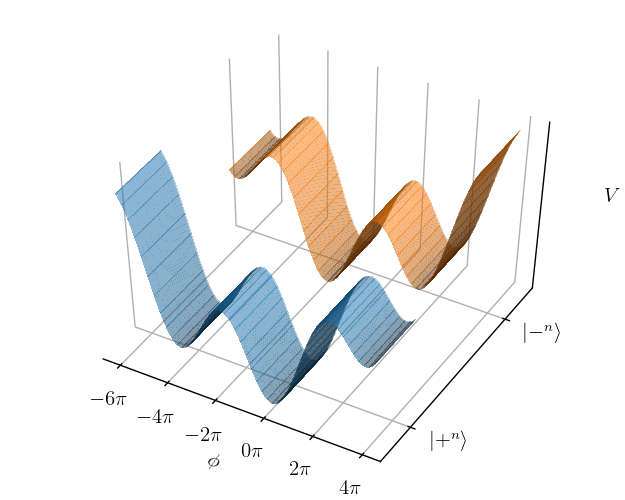

In [14]:
Q = ACQB15
fi_list = np.linspace(-4*pi, 6*pi, 2501)

fi_ext = pi
ng = 0.5
band = 0

st = Q.set_state(ng, fi_ext)

# c = ['xkcd:gray', 'xkcd:green']
c = ['C0', 'C1']


fig = plt.figure( figsize = (5,4))
ax = fig.add_subplot(111, projection='3d')


for i in [1, 0]:
    x = fi_list
    y = abs(i-1) + np.linspace(-.2, .2, 2501)
    X,Y = np.meshgrid(x,y)

    Z = np.zeros( (len(x), len(y)) )

    for j in range(len(y)):
    
    
#     Psi = 100*st.get_Psi(band, i) + 1*st.get_E( band )
        Z[j,:] = 1*Q.V_L(fi_list, fi_ext) +(-1)**i *Q.V_J1e(fi_list)
    

#     ax.plot(x, i*np.ones(101), Z, lw=.5, alpha = 0.9, color = 'xkcd:gray')
    ax.plot_surface(X/2/pi, Y, Z+20, color = c[i],
                   linewidth=0, antialiased=False, alpha = 0.3)
    
    zmin = np.min(Z)
    
#     cset = ax.contourf(X/2/pi, Y, Z, zdir='z', offset = zmin, cmap=cm.binary)
#     ax.plot(x, i*np.ones(101), 1*Psi, lw=.5, alpha = 0.9)
    


# ax.set_zlim(0, 5)
# ax.set_xlim(-51, 51)

ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$V$", rotation  = 0)

ax.set_xlabel( r'$\phi$' )
# ax.set_ylabel( r'$| n \rangle $' )

# ax.set_ylabel( r'$|e\rangle = |1^m -^n \rangle $' )

xticks = np.arange(-2,4)
ax.set_xticks(xticks)
ax.set_xticklabels(r'${:1d} \pi$'.format (-2*j) for j in xticks)

ax.set_yticks([0,1])
ax.set_yticklabels([r'$|-^n \rangle $',  r'$|+^n \rangle $'],verticalalignment='baseline',
                   horizontalalignment='left')
ax.set_zticks([])


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.view_init(50,120)



# fig.text (0.1, .9, r'$a)$', fontsize = 22)

plt.tight_layout()
ax.xaxis._axinfo['label']['space_factor'] = 0.1
plt.show()
plt.savefig('biflux_potential.pdf', transperent = True)   

## WFs

In [4]:

J1 = 30
J2 = 1*J1+0
Q_ideal = ACQubit (E_CL = 7, 
              E_L = 0.000001, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

<IPython.core.display.Javascript object>


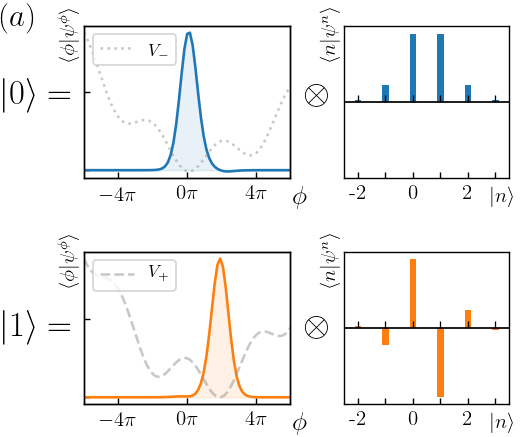

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5277: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5283: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda\lib\site-packages\matplotlib\transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be 

In [68]:

fig = plt.figure(figsize=(4.2,3.5))
gs = GridSpec(2,2, width_ratios=[1.25, 1], wspace = .29, hspace = .48)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])

ax3 = fig.add_subplot(gs[1])
ax4 = fig.add_subplot(gs[3], sharey = ax3)



fi = np.linspace(-6*pi, 6*pi, 301)


# Q = Q_ideal
Q = ACQB15

band = 1
qs = [2,3]
axs = [ax1, ax2]

fi_ext = 2*pi*0.499
st = Q.set_state(ng = 0.5, fi_ext = fi_ext)

j = 0

Vp = 1*Q.V_L(fi, fi_ext) + Q.V_J1e(fi) 
Vm = 1*Q.V_L(fi, fi_ext) - Q.V_J1e(fi) 

Vs = [Vp, Vm]

q0 = 2
q1 = 2

Psi0 = 150*st.get_Psi(0, q0)
N0 = 150*np.array([ max( st.get_Psi(0, qs), key = abs) for qs in np.arange (st.Q_dim)])

Psi1 = 150*st.get_Psi(1, q1)
N1 = 150*np.array([  max( st.get_Psi(1, qs), key = abs) for qs in np.arange (st.Q_dim)])

Psis = [Psi0, Psi1]

cols = ['C0', 'C1']

labs = ['$V_{-}$', '$V_{+}$']

ticks_ats = [ [-2,0,2],
              [-3,-1,1,3]   ]

ticks_ats = [ [-2,0,2],
              [-2,0,2]   ]


lss = [':','--']



for j in [0,1]:

    ax = axs[j]
    
    ax.set_xlim(-3, 3)
    ax_tw = ax.twinx()
    
    ax_tw.plot(fi /2/pi, Vs[j], 'xkcd:gray', ls = lss[j] , alpha=0.5 , label = labs[j])
#     ax_tw.set_ylabel(r'$\bigotimes$')

    ax_tw.legend(loc = 2, prop={'size': 10})

    
    ax.set_ylabel (r'$ \langle \phi |\psi^{\phi} \rangle $' )
    ax.set_yticklabels([])
    ax_tw.set_yticks([])
    
    ticks_at = ticks_ats[j]
    ax.set_xticks(ticks_at)
    ax.set_xticklabels([r'${:1d} \pi$'.format(2*i) for i in ticks_at  ])

    ax.fill_between(st.fi_list /2/pi, 0, Psis[j], alpha = 0.1, color='C{:1d}'.format(j))
    ax.plot(st.fi_list /2/pi , Psis[j], c='C{:1d}'.format(j), ls = '-' )

    ax.xaxis.set_label_coords(1.05, -0.05)
    ax.yaxis.set_label_coords(-0.025, 0.95)
    
#     ax.text (-10*pi, 0.5, 'bla' )
    
    ax.set_xlabel (' $\\phi$', fontsize = 15)

    ax.tick_params(direction="in")

# fig, (ax1, ax2)= plt.subplots(2,1, sharey = True)



ax3.bar(st.Q_list, N0 , color = 'C0', width = 0.25)
ax4.bar(st.Q_list, N1 , color = 'C1', width = 0.25)

for ax in [ax3,ax4]:
    #        ax.set_ylim((-1.1, 1.1))
    
        ax.axhline(0, -2.5, 3.5, color = 'k', lw = 1)

#         ax.set_ylim((-38, 38))

        for i in arange(-3,4):
            ax.vlines(i, 0, 3.5, color = 'k', lw = 0.75)
            
        ax.set_xlim((-2.5, 3.5))
        
#         ax.set_xticks( [] )
#         ax.set_xticks( st.Q_list[:-1] )
        ax.set_xticks( [-2,  -1,  0, 1,   2, 3] )
        ax.set_xticklabels( ['-2','','0','', '2', ''] )        
#         ax.set_xticklabels( [] )
        ax.set_yticks( [] )
#         ax.xaxis.set_label_coords(0.9, .5)

        ax.set_ylabel(r'$\langle n |\psi^{n} \rangle$')
        
        ax.xaxis.set_label_coords(0.97, -.05)
        ax.yaxis.set_label_coords(-0.025, 0.95)

#         tlabs = [r'$| -2 \rangle$', r'$| 0 \rangle$', r'$| +2 \rangle$']
#         for j, i in enumerate([-2, 0 ,2]):
# #             ax.text (i-.15, -12.5, '{:d}'.format(i))
#             ax.text (i-.15, -12.5, tlabs[j], fontsize = 7)

        ax.set_xlabel(r'$|n \rangle$')
        
        ax.tick_params(direction="in")

        autoAxis = ax.axis()
        rec = patches.Rectangle((autoAxis[0],autoAxis[2]),(autoAxis[1]-autoAxis[0]),(autoAxis[3]-autoAxis[2]),
                        lw=2,edgecolor='k', facecolor='none', alpha = 1)
        
#         ax.add_patch(rec)
        
plt.tight_layout()



fig.text (0.00, .94, r'$(a)$', fontsize = 18)
# fig.text (0.02, .40, r'$(b)$', fontsize = 18)



fig.text(.005, 0.76, r'$ |0 \rangle = $', fontsize = 20, color = 'k')
fig.text(.58, 0.76, r'$  \otimes $', fontsize = 20, color = 'k')


fig.text(.005, 0.23, r'$ |1 \rangle = $', fontsize = 20, color = 'k')
fig.text(.58, 0.23, r'$ \otimes $', fontsize = 20, color = 'k')


# plt.tight_layout()

# plt.savefig('biflux_wfs.pdf', transperent = True)   

rec = patches.Rectangle((0, 0), 100, 100, lw=2,edgecolor='C0', facecolor='none', alpha = 1)

# fig.patches.extend([plt.Rectangle((0.01,0.530),0.98,0.465,
#                                   fill=False, color='k', alpha=1, zorder=1000,
#                                   transform=fig.transFigure, figure=fig)])

# fig.patches.extend([plt.Rectangle((0.01,0.005),0.98,0.465,
#                                   fill=False, color='k', alpha=1, zorder=1000,
#                                   transform=fig.transFigure, figure=fig)])

# line = plt.Line2D((.8125,.8125),(.025,.95), color="k", alpha = 0.25, ls = '--')
# fig.add_artist(line)
# fig.text(.8125-0.05, 0.475, r'$n_g = 1/2 $', fontsize = 10, color = 'k')

fig.subplots_adjust(bottom = .075, left=0.16, top = 0.94, right = 0.97)
plt.savefig('biflux_wfs.pdf', transperent = True) 

## Join WFs

<IPython.core.display.Javascript object>


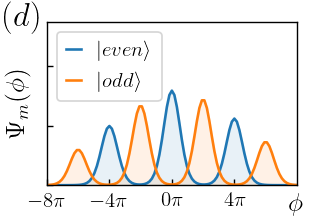

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5277: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5283: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [9]:
fig, ax = plt.subplots(figsize=(2.5, 1.75))

labs = [ r'$|odd \rangle$', r'$|even \rangle$']
cs = ['C1', 'C0']
for j in [1,0]:
    ax.fill_between(st.fi_list /2/pi, 0, Psis[j], alpha = 0.1, color=cs[j])
    ax.plot(st.fi_list /2/pi , Psis[j], c=cs[j], ls = '-', label = labs[j] )
    
ax.legend( loc = 2 , prop={'size': 12}, handlelength = 0.75, bbox_to_anchor = (0.0, 0.7, 0.25,0.3))

ticks_at =  [-4,-2,0,2 ]    
ax.set_xticks(ticks_at)
ax.set_xticklabels([r'${:1d} \pi$'.format(2*i) for i in ticks_at  ])    

ax.set_xlabel(r'$\phi$', fontsize = 15)
ax.set_ylabel(r'$\Psi_m(\phi)$', fontsize = 15)

ax.set_yticklabels([])


ax.set_ylim(0, 55)
ax.set_xlim(-4, 4)


plt.tight_layout()

ax.tick_params(direction="in")

ax.xaxis.set_label_coords(1., -0.05)

# ax.set_title(r'$E_J/E_{CL} = 0.3, E_L = 10^{-4}$')

fig.text (0.01, .88, r'$(d)$', fontsize = 19)

plt.tight_layout()

fig.subplots_adjust( left = .15, bottom = 0.15, right = 0.95)

plt.savefig('even_odd_wfs.pdf', transperent = True)

# plt.title(r'$E_J/E_{CL} = 0.5, E_L = 0.01 GHz$')

### Bands

<IPython.core.display.Javascript object>


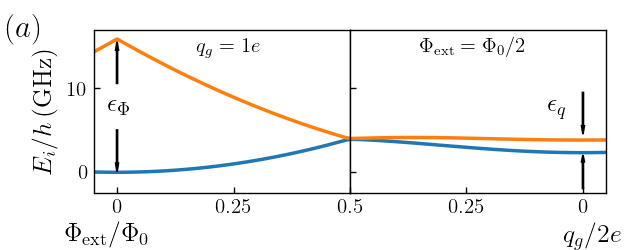

In [24]:



fig, (ax1, ax2)= plt.subplots(1,2, sharey = True, figsize=(5, 2))
Qs = [ ACQB15]

# 

N_ng = 56
N_fi = 56

ng_list = np.linspace(0.5, -.05, N_ng)
fi_ext_list = np.linspace(-0.1*pi, 1*pi, N_fi)

lss = ['-', '-']

axs = [ax1,ax2]

for i in [0]:

    ax_l, ax_r = axs
    
    E_fi = Qs[i].iterate_fi( fi_ext_list, 0.5, 'get_E')  
    E_n = Qs[i].iterate_ng( ng_list, 2*pi*0.5, 'get_E')  


    for b in [0,1]:

        ax_l.plot(fi_ext_list/2/pi,  E_fi[:,b] + 15.2, c = f'C{b}', ls = lss[i], alpha = 1, lw = 2 )
        ax_r.plot(np.flip(ng_list) , np.flip(E_n[:,b]) + 15.2 , c = f'C{b}' , ls= lss[i], lw = 2)

#         ax1.plot(ng_list ,  E_fi[:,1]-E_fi[:,0], c = 'C0' )
#         ax2.plot(fi_ext_list/2/pi , E_n[:,1]-E_n[:,0], c = 'C1' )

    ax_l.set_xlim([-0.05,.5])
    ax_r.set_xlim([.5,-0.05])        
        
plt.subplots_adjust(wspace = 0.00)





ax_l.set_xlabel(r'$\Phi_{\mathrm{ext}}/\Phi_0$', fontsize = 15)
ax_l.xaxis.set_label_coords(0.05, -0.2)
ax_l.text(.17, 14, r'$q_g = 1e$')

x_th = [0,.25]
ax_l.set_xticks(x_th)
ax_l.set_xticklabels(['0','0.25'])


ax_r.set_xlabel(r'$q_{g}/2e$', fontsize = 15)
ax_r.xaxis.set_label_coords(.95, -0.2)

x_th = [.5,.25,0]
ax_r.set_xticks(x_th)
ax_r.set_xticklabels(['0.5','0.25','0'])

ax_r.text(.35, 14, r'$\Phi_{\mathrm{ext}} = \Phi_0/2$')

ax_l.set_ylabel(r'$E_i/h \, \mathrm{(GHz)}$', fontsize = 15)



arr1 =  patches.Arrow(0, 5,    0, -5, width=.01, color = 'k',  zorder=12) 
arr2 =  patches.Arrow(0, 10.6, 0,  5, width=.01, color = 'k',  zorder=12) 
ax_l.add_patch(arr1)
ax_l.add_patch(arr2)
ax_l.text(-.02, 6.75,r'$\epsilon_{\Phi}$', fontsize = 15)
# ax_l.text(-.02, 7,r'$E_{01}( 0 , 1e )$')


arr1 =  patches.Arrow(0, 9.5,    0, -5, width=.01, color = 'k',  zorder=12) 
arr2 =  patches.Arrow(0, -2.0,   0,  4, width=.01, color = 'k',  zorder=12) 
ax_r.add_patch(arr1)
ax_r.add_patch(arr2)
ax_r.text(.075, 6.75,r'$\epsilon_{q}$', fontsize = 15)
# ax_r.text(.15, 7,r'$E_{01}( \Phi_0/2, 0)$')

ax_r.tick_params(direction="in") 
ax_l.tick_params(direction="in") 

ax_l.set_ylim(-2.5,17)

# fig.tight_layout()

fig.subplots_adjust(left=0.15, bottom = 0.23, right = .97)

fig.text (0.01, .85, r'$(a)$', fontsize = 18)

plt.savefig('biflux_disp_bands.pdf', transperent = True)

## Join bands

In [3]:

J1 = 100
J2 = 1*J1+0
Q_ideal2 = ACQubit (E_CL = 7, 
              E_L = 0.0001, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

<IPython.core.display.Javascript object>


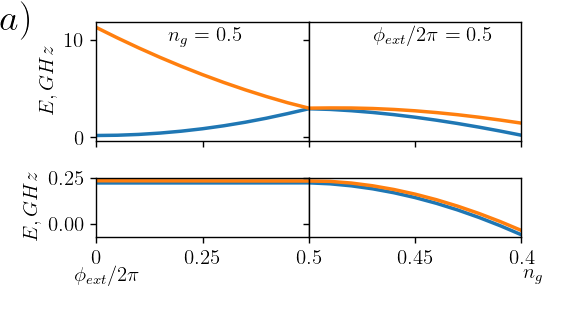

In [329]:



fig = plt.figure(figsize=(4.5, 2.5))
gs = GridSpec(2,2, height_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey = ax1)

ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3], sharey = ax3)



Qs = [ ACQB15, Q_ideal2]

# 

N_ng = 11
N_fi = 11

ng_list = np.linspace(0.5, .4, N_ng)
fi_ext_list = np.linspace(-0*pi, 1*pi, N_fi)

lss = ['-', '-']



axs = [[ax1,ax2],[ax3,ax4]]

off = [8.4, -67.6]

for i in [0,1]:

    ax_l, ax_r = axs[i]
    
    E_fi = Qs[i].iterate_fi( fi_ext_list, 0.5, 'get_E')  
    E_n = Qs[i].iterate_ng( ng_list, 2*pi*0.5, 'get_E')  

    
    E_fi -= off[i]
    E_n -= off[i]

    for b in [0,1]:

        ax_l.plot(fi_ext_list/2/pi,  E_fi[:,b] +0.01*b + 1.3*i, c = f'C{b}', ls = lss[i], alpha = 1, lw = 2 )
        ax_r.plot(np.flip(ng_list) , np.flip(E_n[:,b])+0.01*b + 1.3*i, c = f'C{b}' , ls= lss[i], lw = 2)

#         ax1.plot(ng_list ,  E_fi[:,1]-E_fi[:,0], c = 'C0' )
#         ax2.plot(fi_ext_list/2/pi , E_n[:,1]-E_n[:,0], c = 'C1' )

    
        
    
    ax_l.set_xlim([-0,.5])
    ax_r.set_xlim([.5,0.4])        



#     ax_r.set_yticklabels([])
    
    ax_l.set_ylabel(r'$E, GHz$')
    

        





    x_th = [0,.25]
    ax_l.set_xticks(x_th)

    ax_l.set_xticklabels(['0','0.25'])




    x_th = [.5,.45,.4]
    ax_r.set_xticks(x_th)
    ax_r.set_xticklabels(['0.5','0.45','0.4'])
    plt.setp( ax_r.get_yticklabels(), visible=False) 
    
    if i == 0:
        plt.setp( ax_l.get_xticklabels(), visible=False)  
        plt.setp( ax_r.get_xticklabels(), visible=False)  
        
        ax_l.text(.17, 9.5, r'$n_g = 0.5$')
        ax_r.text(.47, 9.6, r'$\phi_{ext}/2\pi = 0.5$')    
    
    else:
        ax_r.set_xlabel(r'$n_{g}$')
        ax_r.xaxis.set_label_coords(1.05, -0.5)        
        ax_l.set_xlabel(r'$\phi_{ext}/2\pi$')
        ax_l.xaxis.set_label_coords(0.05, -0.5)

fig.subplots_adjust(left=0.2, bottom = 0.22)
fig.text (-0.0, .9, r'$a)$', fontsize = 22)

plt.tight_layout()
plt.subplots_adjust(wspace = 0)

plt.savefig('biflux_dispersion.pdf', transperent = True)

## Parity bands

In [406]:
Q =  ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = 10, 
              E_C = 35,
              dE_J = 0 )

<IPython.core.display.Javascript object>


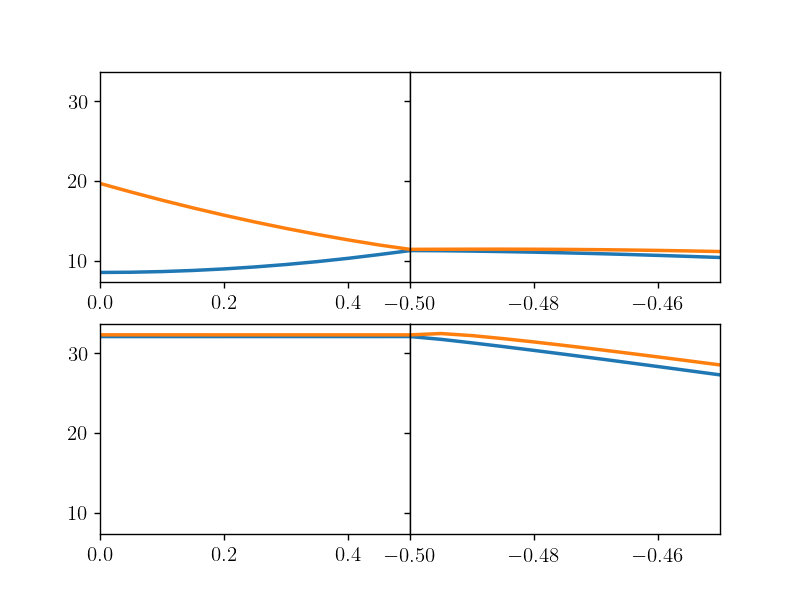

In [8]:
# fig = plt.figure(figsize=(3.5, 3.3))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)


fig, ((ax1, ax2), (ax3,ax4) )= plt.subplots(2,2, sharey = True,  gridspec_kw={'height_ratios': [1, 1]})
Qs = [ ACQB15, Q_ideal]

# 

N_ng = 11
N_fi = 11

ng_list = np.linspace(-0.5, -.45, N_ng)
fi_ext_list = np.linspace(-0*pi, 1*pi, N_fi)

lss = ['-', '-']

axs = [[ax1,ax2],[ax3,ax4]]

for i in [0,1]:

    ax_l, ax_r = axs[i]
    
    E_fi = Qs[i].iterate_fi( fi_ext_list, 0.5, 'get_E')  
    E_n = Qs[i].iterate_ng( ng_list, 2*pi*0.5, 'get_E')  


    for b in [0,1]:

        ax_l.plot(fi_ext_list/2/pi,  E_fi[:,b] +0.1*b + 1.3*i, c = f'C{b}', ls = lss[i], alpha = 1, lw = 2 )
        ax_r.plot(ng_list , E_n[:,b]+0.1*b + 1.3*i, c = f'C{b}' , ls= lss[i], lw = 2)

#         ax1.plot(ng_list ,  E_fi[:,1]-E_fi[:,0], c = 'C0' )
#         ax2.plot(fi_ext_list/2/pi , E_n[:,1]-E_n[:,0], c = 'C1' )

    ax_l.set_xlim([-0,.5])
    ax_r.set_xlim([-.5,-0.45])        
        
plt.subplots_adjust(wspace = 0)



# ax1.set_yscale('log')

# ax1.set_ylim([-1,12])
# ax4.set_ylim([12,15])

# ax2.set_yticks([])

<IPython.core.display.Javascript object>


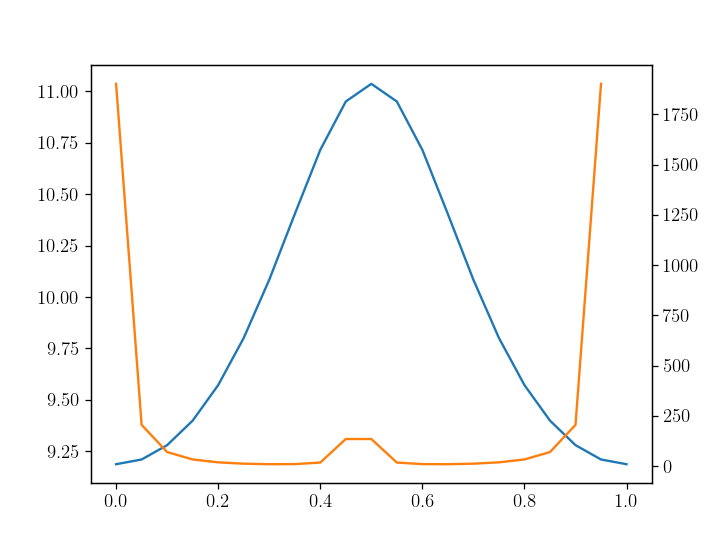

In [323]:
Q = ACQB15

ng_list = np.linspace(0, 1, 21)
E_n = Q.iterate_ng( ng_list, 2*pi*0.0, 'get_E') 

E01 = E_n[:,1] - E_n[:,0]

diff_E = np.diff(E01)

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(ng_list, E01 )
ax2.plot(ng_list[:-1], 1/diff_E**2, color = 'C1' )


<IPython.core.display.Javascript object>


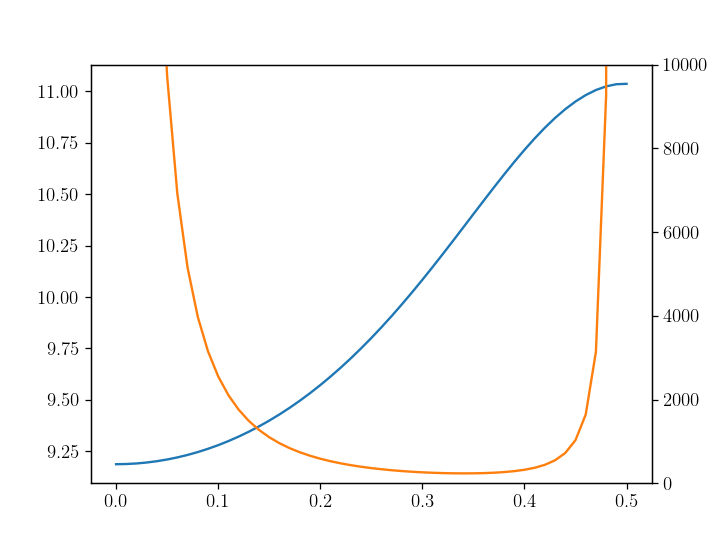

(0, 10000.0)

In [328]:
Q = ACQB15

ng_list = np.linspace(0, .5, 51)
E_n = Q.iterate_ng( ng_list, 2*pi*0.0, 'get_E') 

E01 = E_n[:,1] - E_n[:,0]

diff_E = np.diff(E01)

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(ng_list, E01 )
ax2.plot(ng_list[:-1], 1/diff_E**2, color = 'C1' )

ax2.set_ylim((0,1e4))


## Bands sps dps

In [106]:
Qband =  ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = 10, 
              E_C = 35,
              dE_J = 0 )

<IPython.core.display.Javascript object>


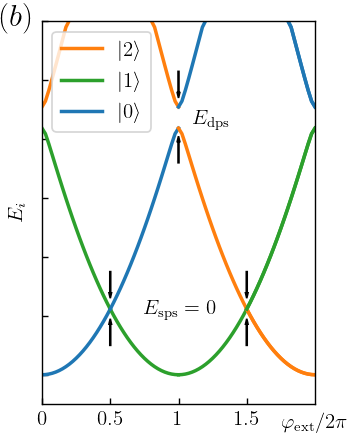

In [107]:
import matplotlib.colors

Q = Qband
segs = [0,1,2,3]

fig, ax= plt.subplots( figsize=(2.8, 3.5))


N_fi = 21

fi_ext_lists = [ np.linspace(i*pi, (i+1)*pi, N_fi) for i in segs ]
    
cs = [['C0', 'C2', 'C1'],
      ['C2', 'C0', 'C1'],
      ['C2', 'C1', 'C0'],
      ['C1', 'C2', 'C0']]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["C0","C2"])

Es = []

for s in segs:
    
    c = cs[s]
    fi_ext_list = fi_ext_lists[s]
    
    E_fi = Q.iterate_fi( fi_ext_list, 0.5, 'get_E')  

    offset = min(E_fi[:,0])
    
    E_fi -= offset
       
#     colorline(fi_ext_list/2/pi,  E_fi[:,0], z = fi_ext_list/10, cmap = cmap)
#     colorline(fi_ext_list/2/pi,  E_fi[:,1], z = fi_ext_list, cmap = cmap)
#     colorline(fi_ext_list/2/pi,  E_fi[:,2], cmap = cmap)

    ax.plot(fi_ext_list/2/pi,  E_fi[:,0] , c = c[0],  alpha = 1, lw = 2 )
    ax.plot(fi_ext_list/2/pi , E_fi[:,1], c = c[1] ,  lw = 2)
    ax.plot(fi_ext_list/2/pi , E_fi[:,2], c = c[2] ,  lw = 2)

ax.plot(fi_ext_list/2/pi,  E_fi[:,0] , c = c[0], lw = 2 , label = r'$|2 \rangle$')
ax.plot(fi_ext_list/2/pi , E_fi[:,1], c = c[1] ,  lw = 2, label = r'$|1 \rangle$')
ax.plot(fi_ext_list/2/pi , E_fi[:,2], c = c[2] ,  lw = 2, label = r'$|0 \rangle$')

ax.legend(loc = 2,fontsize = 12)

ax.set_xlabel(r'$\varphi_{\mathrm{ext}}/2\pi$')
ax.set_ylabel(r'$E_i$')

ax.set_xlim([0, 2])
ax.set_ylim([-1, 12])

ax.set_yticklabels([])

ax.set_xticks([0, 0.5,1,1.5])
ax.set_xticklabels([0, 0.5,1,1.5])

arr1 =  patches.Arrow(0.5, 1.0, 0, .9,  width=.03, color = 'k',  zorder=12) 
arr2 =  patches.Arrow(0.5, 3.5, 0, -.9, width=.03, color = 'k',  zorder=12) 
ax.add_patch(arr1)
ax.add_patch(arr2)

arr1 =  patches.Arrow(1.5, 1.0, 0, .9,  width=.03, color = 'k',  zorder=12) 
arr2 =  patches.Arrow(1.5, 3.5, 0, -.9, width=.03, color = 'k',  zorder=12) 
ax.add_patch(arr1)
ax.add_patch(arr2)


ax.text(0.74, 1.95,r'$E_{\mathrm{sps}} = 0$')

ax.tick_params(direction="in")



arr1 =  patches.Arrow(1, 10.3,  0, -.9, width=.03, color = 'k',  zorder=12) 
arr2 =  patches.Arrow(1, 7.2,   0,  .9, width=.03, color = 'k',  zorder=12) 
ax.add_patch(arr1)
ax.add_patch(arr2)


ax.text(1.1, 8.4,r'$E_{\mathrm{dps}}$')


ax.xaxis.set_label_coords(1.0, -0.025)


fig.subplots_adjust(left = 0.12, top = 0.95, bottom = 0.075)
# fig.subplots_adjust(bottom = .075, left=0.19, top = 0.94, right = 0.97)
fig.text (0.00, .94, r'$(b)$', fontsize = 18)

# plt.tight_layout()

plt.savefig('biflux_bands.pdf', transperent = True)

In [218]:
a = np.array([1,2])
b = np.array([3,4])

np.concatenate([a,b])

array([1, 2, 3, 4])

## Matrix element

In [10]:


ACQB15_symm = ACQubit (E_CL = 15, 
              E_L = 0.7, 
              E_J = 33, #33
              E_C = 8,
              dE_J = 0 )  #6.5 

<IPython.core.display.Javascript object>


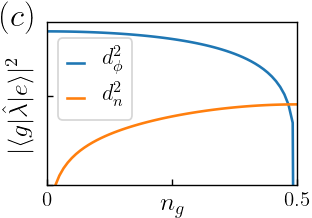

In [12]:


fig, ax = plt.subplots(figsize=(2.5,1.75))
Qs = [ ACQB15_symm]


N_ng = 61
N_fi = 21

ng_list = np.linspace(0, .5, N_ng)
fi_ext_list = np.linspace(0*pi, 1*pi, N_fi)

for Q in Qs:

    melf = Q.iterate_ng( ng_list, 0.25*2*pi, 'get_fi_ij', 0, 1)  
    meln = Q.iterate_ng( ng_list, 0.25*2*pi, 'get_n_ij', 0, 1)  




#     ax.plot(ng_list , melf**2, c = 'C0' ,label = r'$|\langle g | \hat{\phi} | e \rangle|^2$' )
#     ax.plot(ng_list,  meln**2, c = 'C1',label = r'$|\langle g | \hat{n} | e \rangle|^2$' )

    ax.plot(ng_list , melf**2, c = 'C0' ,label = r'$d_{\phi}^2$' )
    ax.plot(ng_list,  meln**2, c = 'C1',label = r'$d_{n}^2$' )



ax.legend(loc = 6, prop={'size': 13}, handlelength = 0.75, bbox_to_anchor = (0.0, 0.5, 0.35,0.3))


ax.set_ylabel(r'$ |\langle g | \hat{\lambda} | e \rangle|^2 $', fontsize = 15)
ax.set_xlabel(r'$n_g $', fontsize = 15)
        
# ax.xaxis.set_label_coords(1.02, -0.12)  



ax.set_yscale('log')
ax.set_ylim([1e-5,3])
ax.set_xlim([0,0.5])

# fig.subplots_adjust(left=0.12, bottom = 0.22)

ax.set_yticklabels([])

ax.set_xticks([0, .25, .5])
ax.set_xticklabels([0, '', .5])

ax.xaxis.set_label_coords(0.5, -0.07)

ax.tick_params(direction="in")

fig.text (0.00, .88, r'$(c)$', fontsize = 19)

plt.tight_layout()
fig.subplots_adjust( left = .15, bottom = 0.15, right = 0.95)

plt.savefig('biflux_matel.pdf', transperent = True)

## 3d bands

In [94]:
bands = [0,1]
# Q = ACQB15

Q = ACQubit (E_CL = 7, 
              E_L = 0.006, 
              E_J = 70, 
              E_C = 35,
              dE_J = 0 )

N_ng = 21
N_fi = 21

ng_list = np.linspace(0, 1, N_ng)
fi_ext_list = np.linspace(0, 2*pi, N_fi)

ng_grd, fi_ext_grd = np.meshgrid(ng_list, fi_ext_list/2/pi)



In [95]:
sts = [Q.set_state(ng = n, fi_ext = f) for n in ng_list for f in fi_ext_list ]

In [6]:
bands = [0,1]
Q3d = ACQB15

N_ng = 11
N_fi = 11

ng_list = np.linspace(0, 0.5, N_ng)
fi_ext_list = np.linspace(0, 1*pi, N_fi)

ng_grd, fi_ext_grd = np.meshgrid(ng_list, fi_ext_list/2/pi)



In [ ]:
sts2 = [Q.set_state(ng = n, fi_ext = f) for n in ng_list for f in fi_ext_list ]

In [97]:
fig = plt.figure()
ax = fig.gca(projection='3d')


c = ['b','r']

for b in bands:

    E3d = np.reshape(np.array([st.get_E()  for st in sts] )[:,b], (N_ng,N_fi ))


    surf = ax.plot_surface(ng_grd, fi_ext_grd, E3d, color = c[b],
                   linewidth=0, antialiased=False, alpha = 0.1)

#     ax.contour3D(ng_grd, fi_ext_grd, E3d, zdir = 'y')
    ax.plot(ng_list, 0.5*np.ones(N_fi), E3d[int(N_fi/2)], c = 'C0' )
    ax.plot(0.5*np.ones(N_ng),fi_ext_list/2/pi , E3d[:, int(N_ng/2)], c = 'C1' )
    ax.plot(ng_list, 0*np.ones(N_fi), E3d[0], c = 'C2' )
#     ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, 0], c = 'C2' )

ax.view_init(azim=-115, elev=15)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_ylabel(r'$n_g, 2e$')
ax.set_xlabel(r'$\phi_{ext}, \Phi_0$')
ax.set_zlabel('Energy')



ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0,  0.5 , 1])
# ax.set_zticklabels([])

plt.tight_layout()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


FigureCanvasNbAgg()

<IPython.core.display.Javascript object>


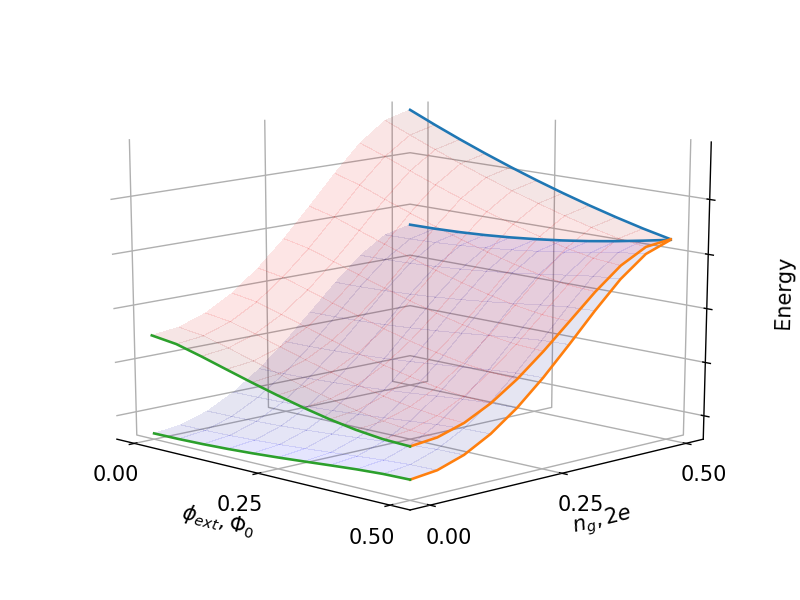

In [181]:
fig = plt.figure()
ax = fig.gca(projection='3d')


c = ['b','r']

for b in bands:

    E3d = np.reshape(np.array([st.get_E()  for st in sts2] )[:,b], (N_ng,N_fi ))


    surf = ax.plot_surface(ng_grd, fi_ext_grd, E3d, color = c[b],
                   linewidth=0, antialiased=False, alpha = 0.1)

#     ax.contour3D(ng_grd, fi_ext_grd, E3d, zdir = 'y')
    ax.plot(ng_list, 0.5*np.ones(N_fi), E3d[-1], c = 'C0' )
    ax.plot(0.5*np.ones(N_ng),fi_ext_list/2/pi , E3d[:, -1], c = 'C1' )
    ax.plot(ng_list, 0.0*np.ones(N_fi), E3d[0], c = 'C2' )
#     ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, 0], c = 'C2' )

ax.view_init(azim=-45, elev=15)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_ylabel(r'$n_g, 2e$')
ax.set_xlabel(r'$\phi_{ext}, \Phi_0$')
ax.set_zlabel('Energy')

ax.set_xticks([0, 0.25, 0.5])
ax.set_yticks([0, 0.25, 0.5])
ax.set_zticklabels([])

plt.tight_layout()

In [26]:
a = np.array([-10,1])

max(a, key = abs)


-10

## Readout scheme

### Rabi

<IPython.core.display.Javascript object>


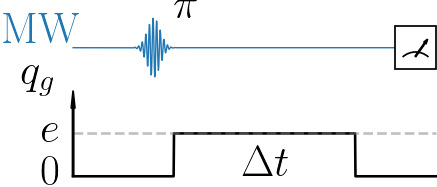

In [42]:
import matplotlib.patches as patches

x= np.linspace(1,10, 1000)

# pump = np.exp(-(x-3)**2/.1)*np.sin(30*x)
pump = 0.7*np.exp(-(x-3)**2/.05)*np.sin(70*x) 
Vg = -3 + np.heaviside(x - 3.5,0) - np.heaviside(x-8,0)



fig, ax = plt.subplots(figsize=(3.5,1.5))
ax.plot(x, pump, lw = .8)
ax.plot(x, Vg, 'k')

const = -2*np.ones( len(x) )
ax.plot(x, const, color = 'gray', alpha = 0.5, ls = '--')

# fig.text (0.1, .8, r'$(a)$', fontsize = 22)

ax.text(-0.3, -1.0, r'$q_g$',           fontsize = 25)
ax.text(5.2, -3, r'$\Delta t$',    fontsize = 25)

ax.text(.2, -3.2, r'$0$',          fontsize = 25)
ax.text(.2, -2.2, r'$e$',          fontsize = 25)

ax.text(-0.75, 0.1, r'$\mathrm{MW}$', fontsize = 25, color = 'C0')

ax.text(3.5, 0.7, r'$\pi$',    fontsize = 25)



# Create a Rectangle patch
rect = patches.Rectangle((9,-.5),1,1, linewidth=1, fill = True, facecolor='white', edgecolor='k', alpha = 1, zorder=10)
arc = patches.Arc((9.5,-.6),1,1,angle = 90, theta1=-40, theta2=40, edgecolor='k', zorder=11)
arr =  patches.Arrow(9.5, -.2, .3, .4, width=.1, color = 'k',  zorder=12) 

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(arc)
ax.add_patch(arr)

arr =  patches.Arrow(1, -3, 0, 2, width=.15, color = 'k',  zorder=12) 
ax.add_patch(arr)




plt.axis('off')

ax.set_xlim((0,12))
ax.set_ylim((-5,2))

fig.subplots_adjust( left = .075, bottom = -0.4,right = 1.18, top = 1.2)

plt.savefig('rabi_readout.pdf', transperent = True)

### Control

<IPython.core.display.Javascript object>


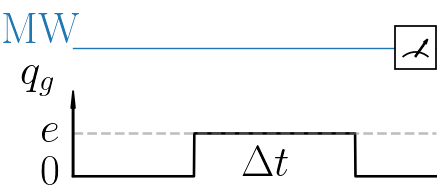

In [41]:
import matplotlib.patches as patches

x= np.linspace(1,10, 1000)

# pump = np.exp(-(x-3)**2/.1)*np.sin(30*x)
pump = 0* np.exp(-(x-3)**2/.03)*np.sin(70*x) 
Vg = -3 + np.heaviside(x - 4,0) - np.heaviside(x-8,0)



fig, ax = plt.subplots(figsize=(3.5,1.5))
ax.plot(x, pump, lw = .8)
ax.plot(x, Vg, 'k')

const = -2*np.ones( len(x) )
ax.plot(x, const, color = 'gray', alpha = 0.5, ls = '--')

# fig.text (0.1, .8, r'$(a)$', fontsize = 22)

ax.text(-0.3, -1.0, r'$q_g$',           fontsize = 25)
ax.text(5.2, -3, r'$\Delta t$',    fontsize = 25)

ax.text(.2, -3.2, r'$0$',          fontsize = 25)
ax.text(.2, -2.2, r'$e$',          fontsize = 25)

ax.text(-0.75, 0.1, r'$\mathrm{MW}$', fontsize = 25, color = 'C0')


# ax.text(3.5, 1, r'$\pi$',    fontsize = 25)



# Create a Rectangle patch
rect = patches.Rectangle((9,-.5),1,1, linewidth=1, fill = True, facecolor='white', edgecolor='k', alpha = 1, zorder=10)
arc = patches.Arc((9.5,-.6),1,1,angle = 90, theta1=-40, theta2=40, edgecolor='k', zorder=11)
arr =  patches.Arrow(9.5, -.2, .3, .4, width=.1, color = 'k',  zorder=12) 

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(arc)
ax.add_patch(arr)

arr =  patches.Arrow(1, -3, 0, 2, width=.15, color = 'k',  zorder=12) 
ax.add_patch(arr)

plt.axis('off')

ax.set_xlim((0,12))
ax.set_ylim((-5,2))


fig.subplots_adjust( left = .075, bottom = -0.4,right = 1.18, top = 1.2)

plt.savefig('control_readout.pdf', transperent = True)

### Ramsey

<IPython.core.display.Javascript object>


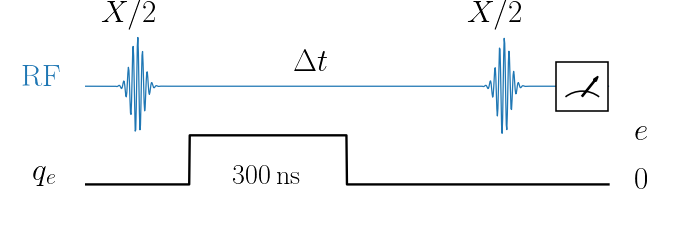

In [347]:
import matplotlib.patches as patches

x= np.linspace(0,10, 1000)

pump = np.exp(-(x-1)**2/.03)*np.sin(70*x) + np.exp(-(x-8)**2/.03)*np.sin(70*x)

Vg = -2 + np.heaviside(x - 2,0) - np.heaviside(x-5,0)

fig, ax = plt.subplots(figsize=(6,2))
ax.plot(x, pump, lw = .8)
ax.plot(x, Vg, 'k')

# fig.text (0.0, .8, r'$(a)$', fontsize = 22)

ax.text(-1, -2, r'$q_e$', fontsize = 20)
ax.text(4, 0.3, r'$\Delta t$', fontsize = 20)

ax.text(2.8, -2, r'$300\, \mathrm{ns}$', fontsize = 18)

ax.text(10.5, -2.1, r'$0$',   fontsize = 20)
ax.text(10.5, -1.1, r'$e$',   fontsize = 20)

ax.text(0.3, 1.3, r'$X/2$', fontsize = 20)
ax.text(7.3, 1.3, r'$X/2$', fontsize = 20)

ax.text(-1.2, 0, r'$\mathrm{RF}$', fontsize = 20, color = 'C0')

# Create a Rectangle patch
rect = patches.Rectangle((9,-.5),1,1, linewidth=1, fill = True, facecolor='white', edgecolor='k', alpha = 1, zorder=10)
arc = patches.Arc((9.5,-.6),1,1,angle = 90, theta1=-40, theta2=40, edgecolor='k', zorder=11)
arr =  patches.Arrow(9.5, -.2, .3, .4, width=.1, color = 'k',  zorder=12) 

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(arc)
ax.add_patch(arr)


plt.axis('off')

ax.set_xlim((0,12))
ax.set_ylim((-4,2))
fig.subplots_adjust( bottom = -0.25,right = 1.05, top = 1.051)

fig.set_edgecolor('black')

plt.savefig('ramsey_readout.pdf', transperent = True)

# Data

## spectrum vs flux

<IPython.core.display.Javascript object>


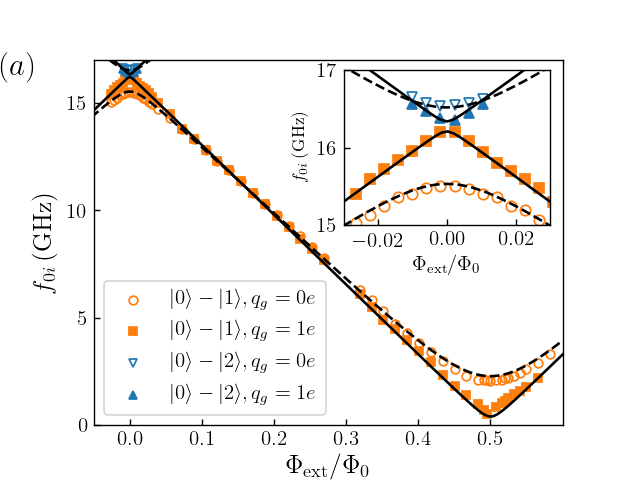

In [76]:
fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

spectrum =  np.genfromtxt(fdir+ 'spectrum.dat')

T0e =  np.genfromtxt(fdir+ 'T_spectrum_0e.dat')
T1e =  np.genfromtxt(fdir+ 'T_spectrum_1e.dat')

flux_T0 = T0e[1:,0]
TE01_0   = T0e[1:,1] 
TE02_0   = T0e[1:,2]

flux_T1 = T1e[1:,0]
TE01_e   = T1e[1:,1] 
TE02_e   = T1e[1:,2]

flux   = spectrum[1:,0]
E01_0  = spectrum[1:,1] 
E01_e  = spectrum[1:,2] 
E02_0  = spectrum[1:,3]
E02_e  = spectrum[1:,4]

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(flux, E01_0 , 'o', color = 'C1',markersize = 5, label = r'$|0\rangle - |1\rangle, q_g = 0e$', markerfacecolor='none')
ax.plot(flux, E01_e , 's', color = 'C1',markersize = 5, label = r'$|0\rangle - |1\rangle, q_g = 1e$')
markersize = 10,
ax.plot(flux, E02_0 , 'v', color = 'C0',markersize = 5, label = r'$|0\rangle - |2\rangle, q_g = 0e$',markerfacecolor='none')
ax.plot(flux, E02_e , '^', color = 'C0',markersize = 5, label = r'$|0\rangle - |2\rangle, q_g = 1e$')

ax.plot(flux_T0, TE01_0 , 'k--')
ax.plot(flux_T0, TE02_0 , 'k--')

ax.plot(flux_T1, TE01_e , 'k-')
ax.plot(flux_T1, TE02_e , 'k-')

ax.set_xlim((-.05,.6))
ax.set_ylim((0,17))

ax.set_yticks([0,5,10,15])

ax.set_xlabel(r'$\Phi_{\mathrm{ext}}/\Phi_{0}$',  fontsize = 15)
ax.set_ylabel(r'$f_{0i} \, (\mathrm{GHz})$',  fontsize = 15)

ax.tick_params(direction="in")

ax.set_xticks(0.1*arange(6))

ax.legend(loc = 3)

left, bottom, width, height = [0.55, 0.55, 0.33, 0.31]
ax2 = fig.add_axes([left, bottom, width, height])


ax2.plot(flux, E01_0 , 'o', color = 'C1',markerfacecolor='none')
ax2.plot(flux, E01_e , 's', color = 'C1')

ax2.plot(flux, E02_0 , 'v', color = 'C0', markerfacecolor='none')
ax2.plot(flux, E02_e , '^', color = 'C0')

ax2.plot(flux_T0, TE01_0 , 'k--')
ax2.plot(flux_T0, TE02_0 , 'k--')

ax2.plot(flux_T1, TE01_e , 'k-')
ax2.plot(flux_T1, TE02_e , 'k-')

ax2.tick_params(direction="in")

ax2.set_xlim((-.03,.03))
ax2.set_ylim((15,17))

ax2.set_xlabel(r'$\Phi_{\mathrm{ext}}/\Phi_{0}$')
ax2.set_ylabel(r'$f_{0i} \, (\mathrm{GHz})$', fontsize = 10)

fig.text (0.0, .85, r'$(a)$', fontsize = 18)

fig.subplots_adjust(left = 0.15, bottom=0.15)

plt.savefig('spectrum a.pdf', transperent = True)

## spectrum vs charge

<IPython.core.display.Javascript object>


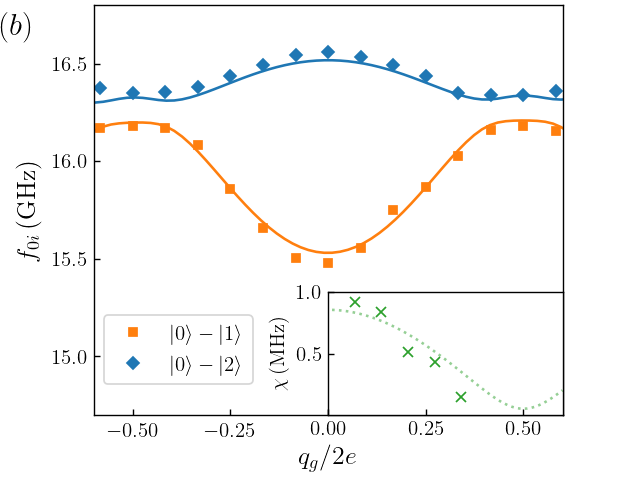

In [38]:
fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

spectrum =  np.genfromtxt(fdir+ 'spec_vsgate.dat')

Tspectrum =  np.genfromtxt(fdir+ 'T_spec_vsgate.dat')


flux_T = Tspectrum[1:,0]
TE01   = Tspectrum[1:,1] 
TE02   = Tspectrum[1:,2]


flux = spectrum[1:,0]
E01  = spectrum[1:,1] 
E02  = spectrum[1:,2] 


fig, ax = plt.subplots(figsize=(5,4))

ax.plot(flux, E01 , 's', color = 'C1', label = r'$|0\rangle - |1\rangle$',markersize = 5)
ax.plot(flux, E02 , 'D',color = 'C0', label = r'$|0\rangle - |2\rangle$',markersize = 5)



ax.plot(flux_T, TE01 , '-', color = 'C1')
ax.plot(flux_T, TE02 , '-', color = 'C0')



ax.set_xlim((-.6,.6))
ax.set_ylim((14.7,16.8))

ax.set_xlabel(r'$q_g / 2e$',  fontsize = 15)
ax.set_ylabel(r'$f_{0i}\, (\mathrm{GHz})$',  fontsize = 15)


ax.set_xticks([-.5,-.25,0,.25,.5])
ax.set_yticks([15, 15.5,16,16.5])

ax.tick_params(direction="in")

ax.legend(loc = 3, bbox_to_anchor=(0.0, 0.05, 0.5, 0.5))
# ax.legend(loc = 3)


disp_exp =  np.genfromtxt(fdir+ 'disp_shift_exp.txt')
disp_th  =  np.genfromtxt(fdir+  'disp_shift_th.txt')


ng_exp    = disp_exp[1:,0]
chi_exp   = disp_exp[1:,1] 

ng_th   = disp_th[1:,0]
chi_th   = disp_th[1:,1] 


left, bottom, width, height = [0.5, 0.0, 0.5, 0.3]
# ax2 = fig.add_axes([left, bottom, width, height])
ax2 = ax.inset_axes((left, bottom, width, height))


ax2.plot(ng_exp, chi_exp, 'x', c = 'C2')
ax2.plot(ng_th, chi_th, ':', c = 'C2', alpha = 0.5)

ax2.set_xlim((0,.6))
ax2.set_ylim((0,1))

ax2.set_xticks([0, 0.25, .5])
ax2.set_xticklabels([])
ax2.set_yticks([ 0.5, 1])

ax2.tick_params(direction="in")

ax2.set_ylabel(r'$\chi \, (\mathrm{MHz})$')



fig.text (0.0, .93, r'$(b)$', fontsize = 18)
fig.subplots_adjust(left = 0.15, bottom=0.17, top = 0.99)

# plt.savefig('spectrum b.pdf', transperent = True)

### Charge + disp shift


<IPython.core.display.Javascript object>


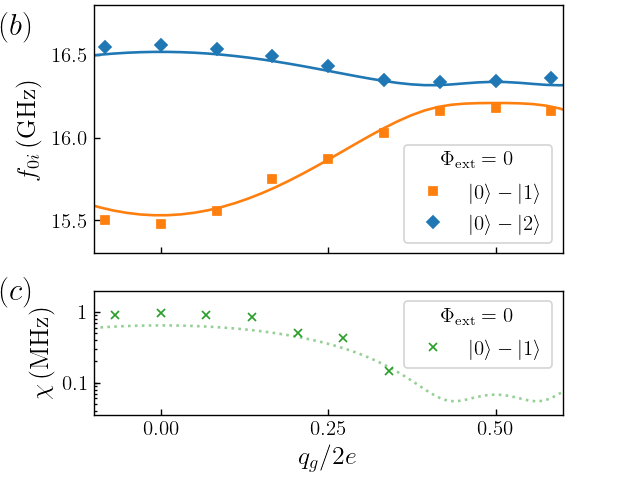

In [134]:
from matplotlib.ticker import FormatStrFormatter

fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

spectrum =  np.genfromtxt(fdir+ 'spec_vsgate.dat')

Tspectrum =  np.genfromtxt(fdir+ 'T_spec_vsgate.dat')


flux_T = Tspectrum[1:,0]
TE01   = Tspectrum[1:,1] 
TE02   = Tspectrum[1:,2]


flux = spectrum[1:,0]
E01  = spectrum[1:,1] 
E02  = spectrum[1:,2] 


fig, (ax, ax2) = plt.subplots(2, 1, figsize=(5,4), gridspec_kw={'height_ratios': [2.0, 1]}, sharex = True)

ax.plot(flux, E01 , 's', color = 'C1', label = r'$|0\rangle - |1\rangle$',markersize = 5)
ax.plot(flux, E02 , 'D',color = 'C0', label = r'$|0\rangle - |2\rangle$',markersize = 5)



ax.plot(flux_T, TE01 , '-', color = 'C1')
ax.plot(flux_T, TE02 , '-', color = 'C0')



ax.set_xlim((-.6,.6))
ax.set_ylim((15.3,16.8))

ax2.set_xlabel(r'$q_g / 2e$',  fontsize = 15)
ax.set_ylabel(r'$f_{0i}\, (\mathrm{GHz})$',  fontsize = 15)


ax.set_xticks([-.5,-.25,0,.25,.5])
ax.set_yticks([ 15.5,16,16.5])

ax.tick_params(direction="in")

# ax.legend(loc = 4, bbox_to_anchor=(0.0, 0.05, 0.5, 0.5))
ax.legend(loc = 4, title = r'$\Phi_{\mathrm{ext}} = 0$')


disp_exp =  np.genfromtxt(fdir+ 'disp_shift_exp.txt')
disp_th  =  np.genfromtxt(fdir+  'disp_shift_th.txt')


ng_exp    = disp_exp[0:,0]
chi_exp   = disp_exp[0:,1] 

ng_th   = disp_th[1:,0]
chi_th   = disp_th[1:,1] 


left, bottom, width, height = [0.5, 0.0, 0.5, 0.3]
# ax2 = fig.add_axes([left, bottom, width, height])
# ax2 = ax.inset_axes((left, bottom, width, height))


ax2.plot(ng_exp, chi_exp, 'x', c = 'C2', label = r'$|0\rangle - |1\rangle$',markersize = 5)
ax2.plot(ng_th, chi_th, ':', c = 'C2', alpha = 0.5)


ymin, ymax = (0.035, 2)

logymin, logymax = round(log(ymin)), round(log(ymax))
ax2.set_xlim((-.1,.6))
ax2.set_ylim((ymin, ymax))

ax2.set_yscale('log')


for decade in [0, -1]:

    base = 10**decade
    for i in arange(0.1*base, 1*base,0.1*base):
        ax2.hlines(i, -0.1, -0.095, color = 'k', lw = 0.75)




ax2.set_xticks([0, 0.25, .5])
# ax2.set_xticklabels([])
ax2.set_yticks     ([ 0.1, 1])
ax2.set_yticklabels([ 0.1, 1])

ax2.tick_params(direction="in")
# ax2.tick_params(axis='y', which='minor') 
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%.03f'))

ax2.set_ylabel(r'$\chi \, (\mathrm{MHz})$',  fontsize = 15)

ax2.legend(title = r'$\Phi_{\mathrm{ext}} = 0$', loc = 1)


fig.text (0.0, .93, r'$(b)$', fontsize = 18)

fig.text (0.0, .4, r'$(c)$', fontsize = 18)

fig.subplots_adjust(left = 0.15, bottom=0.17, top = 0.99)

# fig. tight_layout()

# plt.savefig('spectrum b.pdf', transperent = True)

In [131]:
arange(logymin, logymax, 0.1)

array([-4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
       -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
       -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
       -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
       -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
       -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        3.55271368e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01])

## Decay

<IPython.core.display.Javascript object>


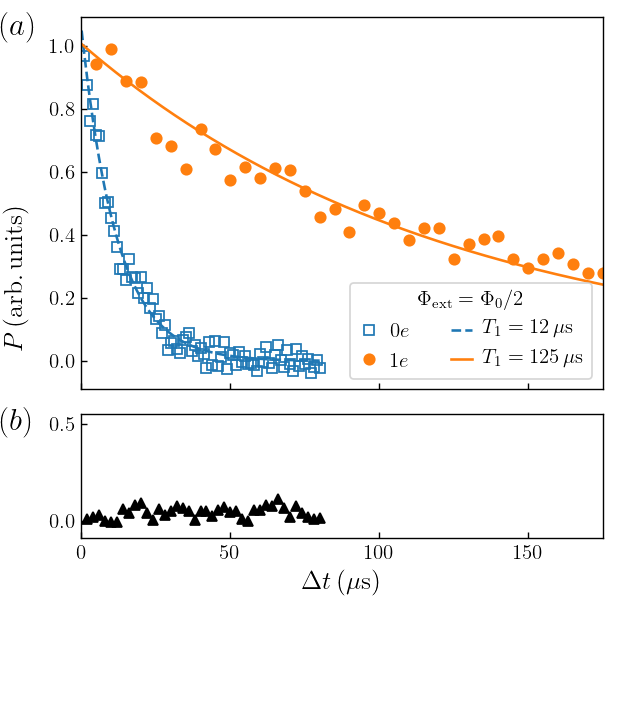

In [75]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(5,5.75),sharex = True,  gridspec_kw={'height_ratios': [3, 1]})



fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

decay_0e    =  np.genfromtxt(fdir+ 'decay_0e.dat')
decay_1e    =  np.genfromtxt(fdir+ 'decay_1e.dat')
decay_nosig =  np.genfromtxt(fdir+ 'decay_nosig.dat')

fit_decay_0e    =  np.genfromtxt(fdir+ 'fit_decay_0e.dat')
fit_decay_1e    =  np.genfromtxt(fdir+ 'fit_decay_1e.dat')

# Tspectrum =  np.genfromtxt(fdir+ 'T_spec_vsgate.dat')

decays = [decay_0e, decay_1e, decay_nosig, fit_decay_0e, fit_decay_1e]
mark = ['s','o','^', '--', '-']
cls =  ['C0','C1','k', 'C0', 'C1']
# lab = [r'$q_g = 0e$',r'$q_g = 1e$','',r'$T_1 = 2.5 \mu \mathrm{s} $',r'$T_1 = 15 \mu \mathrm{s} $']
lab = [r'$0e$',r'$1e$','',r'$T_1 = 12\, \mu \mathrm{s} $',r'$T_1 = 125 \, \mu \mathrm{s} $']

for i in [0,1,3,4]:
    
    decay = decays[i]

    dt   = decay[1:,0]
    ampl = decay[1:,1]
    if i == 0 :
        ax.plot(dt/1e3, ampl/.0006 , mark[i], color = cls[i], label = lab[i],  markerfacecolor='none')
    else:
        ax.plot(dt/1e3, ampl/.0006 , mark[i], color = cls[i], label = lab[i])


a = 0    
T = 12  
    
    
# ax.plot(dt/1e3, a+(1-a)*np.exp(-dt/T/1e3))


decay = decays[2]

dt   = decay[1:,0]
ampl = decay[1:,1]
ax2.plot(dt/1e3, ampl/.0006 , mark[2],color = cls[2], label = lab[2])


# ax2.plot(dt/1e3, a*(1 - np.exp(-dt/T/1e3)))

ax2.set_ylim((-0.09,.55))
    

ax.set_xlim((0,175))
ax.set_ylim((-0.09,1.09))

ax2.set_xlabel(r'$\Delta t\,(\mu \mathrm{s})$',  fontsize = 15)
ax.set_ylabel(r' $P\, \mathrm{ (arb. \, units)}$',  fontsize = 15)


ax.yaxis.set_label_coords(-0.1, 0.3)

# ax.set_xticks([-.5,-.25,0,.25,.5])
ax2.set_yticks([0,0.5])


ax.legend(loc = 4,ncol=2, handletextpad=0.5, handlelength=1, title = r'$\Phi_{\mathrm{ext}} = \Phi_0/2$' )

ax.tick_params(direction="in")
ax2.tick_params(direction="in")

ax2.set_xticks(50*arange(4))

# ax.text(0.4, 16.6, r'$120\, \mathrm{MHz}$', fontsize = 15)

fig.text (0.0, .95, r'$(a)$', fontsize = 18)
fig.text (0.0, .4, r'$(b)$', fontsize = 18)


plt.tight_layout()

# fig.subplots_adjust(hspace = 0.00)

fig.subplots_adjust(bottom=0.25, left = .13, hspace = 0.1, top = 0.975)

plt.savefig('decay1.pdf', transperent = True)

In [104]:
E01 = 0.4
kT = 10
np.exp(-E01/kT*50)

0.1353352832366127

<IPython.core.display.Javascript object>


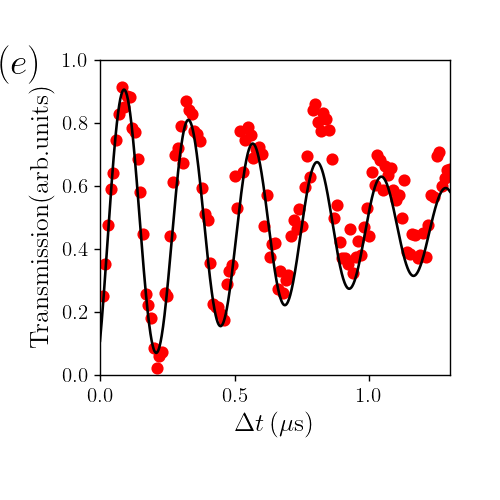

In [35]:
fig, ax = plt.subplots(figsize=(4,4))

fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

rabi    =  np.genfromtxt(fdir+ 'rabi.dat')
fit_rabi   =  np.genfromtxt(fdir+ 'fit_rabi.dat')




decays = [rabi, fit_rabi]
mark = ['ro','k-']
lab = ['','']

for i in [0,1]:
    
    decay = decays[i]

    dt   = decay[1:,0]
    ampl = decay[1:,1]





    ax.plot(dt/1e3, ampl/.00065 , mark[i], label = lab[i])



ax.set_xlim((0,1.3))
ax.set_ylim((0,1))

ax.set_xlabel(r'$\Delta t\,(\mu \mathrm{s})$',  fontsize = 15)
ax.set_ylabel(r'$\mathrm{Transmission (arb. units)}$',  fontsize = 15)


# ax.set_xticks([-.5,-.25,0,.25,.5])
# ax.set_yticks([15.5,16,16.5])


# ax.legend()



# ax.text(0.4, 16.6, r'$120\, \mathrm{MHz}$', fontsize = 15)

fig.text (0.0, .85, r'$(e)$', fontsize = 22)
fig.subplots_adjust(bottom=0.25, left = .2)

plt.savefig('decay2.pdf', transperent = True)

## Ramsey

In [4]:
Q = ACQB15

<IPython.core.display.Javascript object>


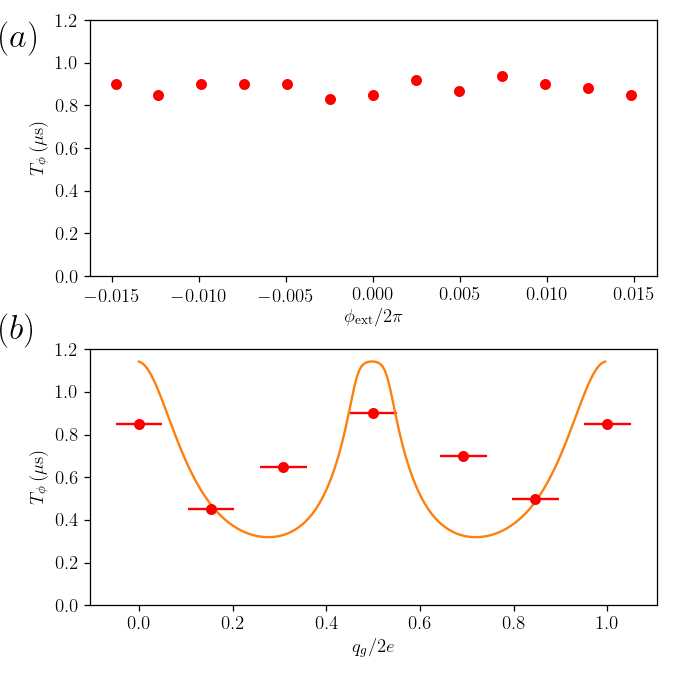

In [7]:

Npts = 201
ng_list = np.linspace(0, 1, Npts)
E_n = Q.iterate_ng( ng_list, 2*pi*0.0, 'get_E') 

E01 = E_n[:,1] - E_n[:,0]

diff_E = np.diff(E01)




fig, (ax2, ax1) = plt.subplots(2,1, figsize=(6,6))

fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

T2ch    =  np.genfromtxt(fdir+ 'T2 charge.dat')
T2fl   =  np.genfromtxt(fdir+ 'T2 flux.dat')


ngs   = T2ch[:,0]
T2_ch = T2ch[:,1]

fls   = T2fl[:,0]
T2_fl = T2fl[:,1]


# ax1.plot(ngs, T2_ch, 'rs' )
ax2.plot(fls, T2_fl, 'ro' )

xerr = 0.05*np.ones(np.size(ngs))
ax1.errorbar(ngs, T2_ch, xerr= xerr, fmt = 'o', color = 'r')
ax1.plot(ng_list[:-1], 0.8e-4/(0.7e-4+diff_E**2), color = 'C1' )


ax1.set_ylim((0,1.2))
ax2.set_ylim((0,1.2))

# ax.set_xlim((0,1.3))
# ax.set_ylim((0,1))

ax1.set_xlabel(r'$q_g/2e$')
ax1.set_ylabel(r'$ T_{\phi}\, (\mu \mathrm{s})$')

ax2.set_xlabel(r'$\phi_{\mathrm{ext}}/2\pi$')
ax2.set_ylabel(r'$ T_{\phi}\, (\mu \mathrm{s})$')

# # ax.set_xticks([-.5,-.25,0,.25,.5])
# # ax.set_yticks([15.5,16,16.5])


# # ax.legend()



# # ax.text(0.4, 16.6, r'$120\, \mathrm{MHz}$', fontsize = 15)

fig.text (0.0, .93, r'$(a)$', fontsize = 22)
fig.text (0.0, .50, r'$(b)$', fontsize = 22)

fig.subplots_adjust(bottom=0.25, left = .2)
plt.tight_layout()

plt.savefig('T2_data.pdf', transperent = True)



<IPython.core.display.Javascript object>


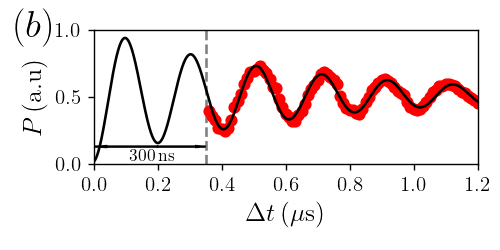

In [108]:
fig, ax = plt.subplots(figsize=(4,2))

fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

ramsey    =  np.genfromtxt(fdir+ 'ramsey.dat')
fit_ramsey   =  np.genfromtxt(fdir+ 'fit_ramsey.dat')




decays = [ramsey , fit_ramsey ]
mark = ['ro','k-']
lab = ['','']

for i in [0,1]:
    
    decay = decays[i]

    dt   = decay[1:,0]
    ampl = decay[1:,1]





    ax.plot(dt/1e3, ampl , mark[i], label = lab[i])

    
ax.vlines(.35, 0, 1, ls = '--', colors = 'gray')    


ax.set_xlim((0,1.2))
ax.set_ylim((0,1))

ax.set_xlabel(r'$\Delta t\,(\mu \mathrm{s})$',  fontsize = 15)
ax.set_ylabel(r'$P\, \mathrm{(a.u)}$',  fontsize = 15)


# ax.set_xticks([-.5,-.25,0,.25,.5])
# ax.set_yticks([15.5,16,16.5])


# ax.legend()

arr1 =  patches.Arrow(.2, .13, -.2, 0, width=.02, color = 'k',  zorder=12) 
arr2 =  patches.Arrow(.2, .13, .15, 0, width=.02, color = 'k',  zorder=12) 

# Add the patch to the Axes
ax.add_patch(arr1)
ax.add_patch(arr2)

# ax.text(.05, 0.02, r'$V_g \, \mathrm{time } \, \, \, 300\, \mathrm{ns}$', fontsize = 15, color = 'k')
ax.text(.11, 0.02, r'$ 300\, \mathrm{ns}$', fontsize = 10, color = 'k')


# ax.text(0.4, 16.6, r'$120\, \mathrm{MHz}$', fontsize = 15)

fig.text (0.03, .85, r'$(b)$', fontsize = 22)
fig.subplots_adjust(bottom=0.25, left = .2)
plt.tight_layout()

plt.savefig('ramsey.pdf', transperent = True)

### Fitting to ramsey

<IPython.core.display.Javascript object>


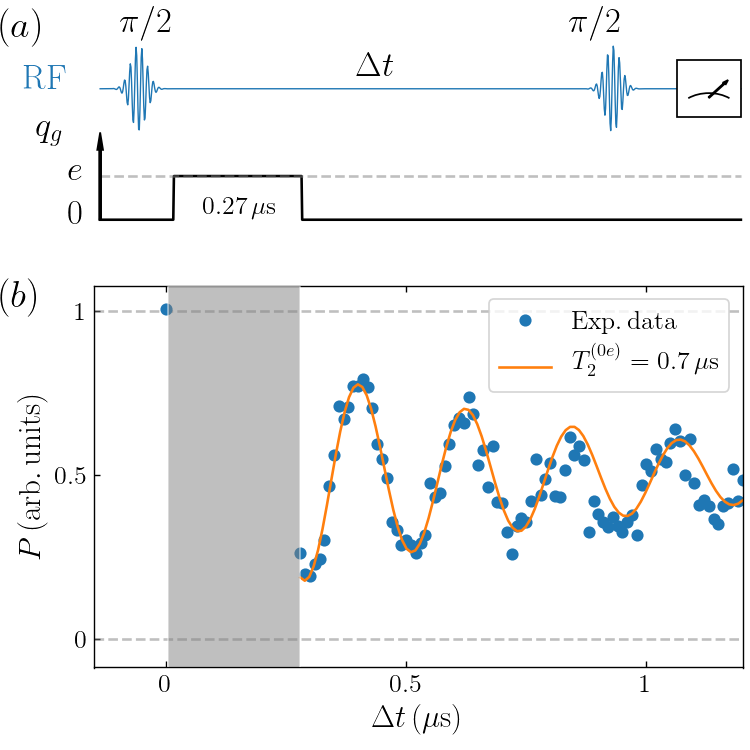

In [116]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (6,6), gridspec_kw={'height_ratios': [1, 2]})

fig.text (0.0, .95, r'$(a)$', fontsize = 22)
fig.text (0.0, .59, r'$(b)$', fontsize = 22)

fig.subplots_adjust(right =.99, top = 0.9)

# fig.text(.25, 0.33 , r'$T_2^{(1e)} > 700 \, \mathrm{ns}$')
# fig.text(.3, 0.3 , r'fdgd')

plot_T2_meas()
plot_T2_pulses()

In [112]:

def plot_T2_meas():

    ax = ax2




    t_ = np.linspace(0, 280, 10001) 
    t  = np.linspace(280, 1200, 101)

    def ramsey_fit(t, y0, a, t0, w, phi):

        return y0 + a*np.exp(-t/t0)*np.sin(np.pi/w*t+phi)


    def exp_fit(t, y0, a, t0, w, phi):

        return y0 + a*np.exp(-t/t0)


    def exp_fit2(t, y0, a, t0, w, phi):

        return y0 - a*np.exp(-t/t0)

    fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

    P = dict()
    T = dict()

    for q in ['015e','03e','05e']:

        data =  np.genfromtxt(fdir+ f'Ramsey_{q}.dat')

        T[q] = data[:,0]
        P[q] = data[:,1]


    for q in ['05e']: #['015e','03e','05e']:
    #     fig, ax = plt.subplots()

        y0 = np.mean(P[q])
        a = .2e-3 - y0

        popt, pcov = optimize.curve_fit(ramsey_fit, T[q][:-61],
                                                    P[q][:-61],
                                                    p0=[y0, a, 700,  100,0 ])    
    #     popt, pcov = optimize.curve_fit(ramsey_fit, T[q], P[q],
    #                                                    p0=popt)    



    #     popt[0] = y0
    #     popt[1] = a
        popt_M = [-4.7e-4, 8e-4, 650, 100, -23/108]

        ax.plot(T[q], P[q], 'o',  label = r'$\mathrm{Exp.\, data}$')
    #     ax.plot(t, ramsey_fit(t, *popt) , '-', label = r'$T_2^* (0e) = {:3.0f} \mathrm{ns}$'.format(popt[2]) )
        ax.plot(t, ramsey_fit(t, *popt) , '-', label = r'$T_2^{(0e)} = 0.7 \, \mathrm{\mu s}$' )



        popt[3] =  290/70
        popt[4] =  -np.pi/2
    #     ax.plot(t_, ramsey_fit(t_, *popt) , ':',alpha = .5 , c = 'gray')

        ax.plot(0, -1.38e-3, 'o', c = 'C0')

        ax.tick_params(direction="in")    


    #     ax.plot(t, exp_fit(t, *popt) , '--', label = 'P(0) = {:3.2f} mV'.format(1e3*exp_fit(0, *popt)) )
    #     ax.plot(t, exp_fit2(t, *popt) , '--', label = 'P(0) = {:3.2f} mV'.format(1e3*exp_fit2(0, *popt)) )

        popt[2] = -300/np.log (1 - (.2e-3 - exp_fit(300, *popt))/popt[1]) 
        popt[0] = y0
        popt[1] = a

    #     ax.plot(t, exp_fit(t, *popt) , '--', label = 'T2 = {:3.0f} ns'.format(popt[2]) )
    #     ax.plot(t, exp_fit2(t, *popt) , '--',  label = 'P(0) = {:3.2f} mV'.format(1e3*exp_fit2(0, *popt))  )


        ax.set_ylim(( .5e-3, -1.5e-3))


        ax.set_xlim((-150, 1200))

    #     ax.plot(t, ramsey_fit(t, *popt_M) , '-', label = 'Matt T2 = {:3.0f} ns'.format(popt_M[2]) )
    #     ax.plot(t, exp_fit(t, *popt_M) , '--', label = 'Matt P(0) = {:3.2f} mV'.format(1e3*exp_fit(0, *popt_M)) )



    #     ax.set_title(f'q = {q}')

        ax.legend(fontsize = 15)

    #     plt.savefig(f'ramsey_q={q}.png', transperent = True)    

    #     print(popt)


    xtck = [0, 500, 1000]
    ax.set_xticks(xtck)
    ax.set_xticklabels([0, 0.5, 1])

    ax.tick_params(top = True, labelsize = 15)
    # .5e-3, -1.5e-3
    rect = patches.Rectangle((5,-1.5e-3),275,2e-3, linewidth=1, fill = True, facecolor='grey', edgecolor='w',
                             alpha = 0.5, zorder=101)
    ax.add_patch(rect)

    l0 = .35e-3
    l1 = -1.37e-3

    ax.hlines(l0, -150, 1200, color = 'grey', ls = '--', alpha = 0.5)
    ax.hlines(l1, -150, 1200, color = 'grey', ls = '--', alpha = 0.5)

    ax.set_yticks([l0,  l0 + (l1-l0)/2,  l1])
    ax.set_yticklabels([0, 0.5, 1])

    ax.set_xlabel(r'$\Delta t \, ( \mu \mathrm{s})$', fontsize = 18)
    ax.set_ylabel(r'$P \, \mathrm{(arb. \, units)}$', fontsize = 18)

In [115]:
def plot_T2_pulses():

    ax = ax1



    x= np.linspace(0,10, 1000)

    pump = np.exp(-(x-0.6)**2/.03)*np.sin(70*x) + np.exp(-(x-8)**2/.03)*np.sin(70*x)

    Vg = -3 + np.heaviside(x - 1.15,0) - np.heaviside(x-3.15,0)



    # fig, ax = plt.subplots(figsize=(6,2))
    ax.plot(x, pump, lw = .8)
    ax.plot(x, Vg, 'k')

    const = -2*np.ones( len(x) )
    ax.plot(x, const, color = 'gray', alpha = 0.5, ls = '--')


    # fig.text (0.0, .8, r'$(a)$', fontsize = 22)

    ax.text(-1, -1.2, r'$q_g$', fontsize = 20)
    ax.text(4, 0.3, r'$\Delta t$', fontsize = 20)

    ax.text(1.6, -2.9, r'$0.27\, \mu\mathrm{s}$', fontsize = 15)

    ax.text(-.5, -3.1, r'$0 $',   fontsize = 20)
    ax.text(-.5, -2.1, r'$ e$',   fontsize = 20)

    ax.text(0.3, 1.3, r'$\pi/2$', fontsize = 20)
    ax.text(7.3, 1.3, r'$\pi/2$', fontsize = 20)

    ax.text(-1.2, 0, r'$\mathrm{RF}$', fontsize = 20, color = 'C0')

    # Create a Rectangle patch
    rect = patches.Rectangle((9,-.65),1,1.3, linewidth=1, fill = True, facecolor='white', edgecolor='k', alpha = 1, zorder=10)
    arc = patches.Arc((9.5,-.6),1,1,angle = 90, theta1=-40, theta2=40, edgecolor='k', zorder=11)
    arr =  patches.Arrow(9.5, -.2, .3, .4, width=.1, color = 'k',  zorder=12) 

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.add_patch(arc)
    ax.add_patch(arr)


    arr =  patches.Arrow(0, -3, 0, 2, width=.15, color = 'k',  zorder=12) 
    ax.add_patch(arr)

    ax.axis('off')

    ax.set_xlim((-0.1,10.025))
    # ax.set_ylim((-4,2))
    # fig.subplots_adjust( bottom = -0.25,right = 1.05, top = 1.051)

    fig.set_edgecolor('black')

    fig.subplots_adjust(right =.99, top = 0.95)

    plt.savefig('T2.pdf', transperent = True)

# Qcodes spec

In [40]:
SAMPLE = 'ACQ0B9'

qc.config["core"]["db_location"] = r'E:\OneDrive - Rutgers University\files_py\expdata\Experiments_{}.db'.format(SAMPLE)
# automatically uses a different DB file for each month
initialise_database()
# creates a new DB file if nonexistant; leaves it untouched if file already exists

In [111]:

vmin = -0.5e-3
vmax =  1.9e-3




# fig, ax = plt.subplots(figsize = (5,1.65))
axes1, new_colorbars1 = plot_by_id(330,ax)


# ax.set_xlim(4e-6, 20e-6)
# ax.set_ylim(5e8, 13e9)

ax.set_title('')
ax.set_xlabel(r'$\mathrm{Time \, (h)}$')
# ax.set_ylabel(r'$ q_{\mathrm{offset}} \,  (2e)$', fontsize = 15)
ax.set_ylabel(r'$ q_g \,  (2e)$')

xtick = np.arange(5)
ax.set_xticks(xtick *2* 30e-6/8.75 )
ax.set_xticklabels(xtick*2)

print(ax.get_xticks() )


ax.set_yticks([0,0.6, 1.2])
ax.set_yticklabels([0,0.5, 1])


new_colorbars1[0].remove()
# new_colorbars1[0].set_ticklabels('')



# plt.tight_layout()

# fig.subplots_adjust( left = 0.125, right = 1.01, bottom = 0.275, top = .99 )
fig.subplots_adjust(  top = .95, bottom = 0.1 )
# plt.savefig('charge_fluc.pdf', transperent = True)

txt = ax.text (-.25/2, 0.9,  r'$(e)$', color = 'k', 
             fontsize = 12,  transform=ax.transAxes, zorder = 501)

plt.savefig('qp poisoning.pdf', transperent = True)

plt.show()

[0.00000000e+00 6.85714286e-06 1.37142857e-05 2.05714286e-05
 2.74285714e-05]


# QP plots

<IPython.core.display.Javascript object>


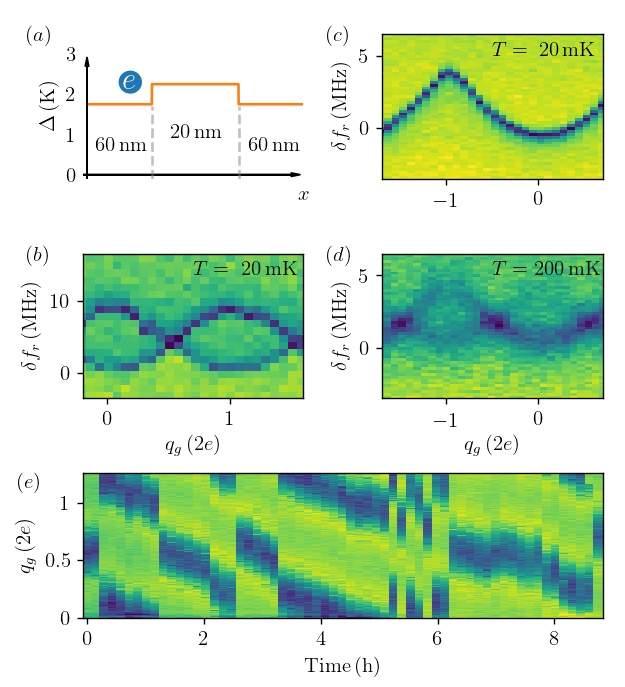

In [110]:
fig = plt.figure(figsize = (5, 5.5))

gs = GridSpec(3, 2)

# ax1 = fig.add_subplot(gs[ 0, :4])

# ax2 = fig.add_subplot(gs[ 0, 4: ])
# ax3 = fig.add_subplot(gs[ 1,  :2 ])
# ax4 = fig.add_subplot(gs[ 1, 2:4] ,  sharey=ax3)
# ax5 = fig.add_subplot(gs[ 1, 4: ] , sharey=ax3)

# axs = [ax2,ax3,ax4,ax5]

axs = [fig.add_subplot(gs[i]) for i in [2,1,3]]

# ax3.set_ylim(6.7330, 6.7430)

fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'


files = ['b', 'c',  'e']

df = [6.3626, 6.7367, 6.7367, 6.7367]

for i in range(3):

    ax = axs[i]
    data =  np.genfromtxt(fdir+ f'{files[i]}.dat')

    ng     = data[0,1:]
    freq   = (data[1:,0] - df[i])*1e3 
    Disp   = data[1:,1:]

    Ng, Freq = np.meshgrid(ng, freq)

    ax.pcolormesh( Ng, Freq, Disp, cmap = 'viridis')
    ax.set_ylim(-3.5, 6.5)
    ax.set_xlim(-1.7, 0.7) 
    
    ax.set_xlabel(r'$q_g \, (2e)$')
    ax.set_ylabel(r'$\delta f_r \, \mathrm{(MHz)}$')
    


axs[0].set_ylim(-3.5, 16.5) 
axs[0].set_xlim(-0.2, 1.6) 

axs[1].set_xlabel('')

# ax4.set_yticklabels([])
# ax5.set_yticklabels([])

ax = fig.add_subplot(gs[0])

x= np.linspace(0.1,10, 1000)

D1 = 1.75
dD = 0.5

x1 = 3
x2 = 7

delta = D1 + dD*(np.heaviside(x - x1,0) - np.heaviside(x-x2,0))

ax.plot(x, delta, c = 'C1')

ax.set_xlim(-.2,10)
ax.set_ylim(-.1,3.5)

ax.set_yticks([0, 1, 2, 3])

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\Delta \, \mathrm{(K)}$')
ax.xaxis.set_label_coords(1., -0.05)


ax.set_xticks([])

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params( axis = 'y' , length=0)

patches.ArrowStyle("simple", head_length=4.4, head_width=.4, tail_width=.4)


style="Simple,head_length=5,head_width=2,tail_width=.1"

arr = patches.FancyArrowPatch((0,-1), (0,3),arrowstyle=style,alpha=1,fc='k' )

ax.add_patch(arr)

arr = patches.FancyArrowPatch((-1,0), (10,0),arrowstyle=style,alpha=1,fc='k' )
ax.add_patch(arr)

cir =  patches.Ellipse( (2.0, 2.3), width = 1, height= 1.5*3.6/10.2 ,  color = 'C0',  zorder=12) 
ax.add_patch(cir)
ax.text(1.68, 2.125, r'$e $', fontsize = 18, color = 'w',  zorder=13)

ax.axvline(x1, 0, 0.5, color = 'gray',ls = '--', alpha = .5)
ax.axvline(x2, 0, 0.5, color = 'gray',ls = '--', alpha = .5)

ax.text(.35,0.6, r'$60 \, \mathrm{nm}$')
ax.text(7.45,0.6, r'$60 \, \mathrm{nm}$')

ax.text(3.9,0.9, r'$20 \, \mathrm{nm}$')

ax.text (-.25, 0.95,  r'$(a)$', color = 'k',
         fontsize = 12,  transform=ax.transAxes, zorder = 501)

# ax.axis('off')
    
fig.tight_layout()

Ts = ['\;20','\: 20','200']
labs = ['(b)', '(c)', '(d)']
for i in range(3):
    ax = axs[i]
    ax.text (0.5, 0.85,  r'$T = {} \, \mathrm {{mK}}   $'.format(Ts[i]), color = 'k',
             fontsize = 12,  transform=ax.transAxes)

    ax.text (-.25, 0.95,  r'${}$'.format(labs[i]), color = 'k',
             fontsize = 12,  transform=ax.transAxes, zorder = 501)

ax = fig.add_subplot(gs[4:])
    
    
# plt.savefig('qp poisoning.pdf', transperent = True)

# texts

<IPython.core.display.Javascript object>


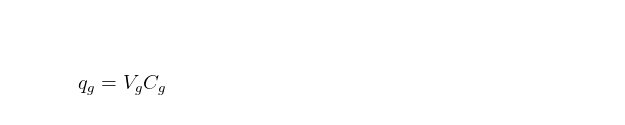

In [79]:
fig, ax = plt.subplots(figsize= (5,1))

plt.axis('off')


# ax.text(0,.8, r'$t_1 \neq t_2 \neq t_3 ~~ \sum{\vec{t}_i} \neq 0 ~~ \sum{\vec{t}_i} = 0 $')

# ax.text(0,.5, r'$q ~~ \alpha_q ~~ \Phi_1 ~~ \Phi_2 ~~ q_1 ~~ q_2 ~~ q_N $')
# ax.text(0,.2, r'$\alpha_{q_1} ~~ \alpha_{q_2} ~~ t_1  \neq t_2 ~~ t_1(\Phi_1) ~~ t_2(\Phi_2) $')

# ax.text(0,.2, r'$(a) \, (b) \, \mathrm{CPB} \, \mathrm{SI} \, \mathrm{JJs}\, L_{sh} \, L_R \, L_C \, L_R\mathrm{MW \, line}\$')

# ax.text(0,.2, r'$(a) \;q (b) \;q \mathrm{CPB} \;q \mathrm{SI} \;q \mathrm{JJs} \;q     \mathrm{q}\; L_{sh} \;\mathrm{q}\; L_R \;\mathrm{q}\; C_R \; q \mathrm{q}\; q \mathrm{MW \, line} $')
ax.text(0,.2, r'$q_g = V_g C_g $')

plt.savefig('text_device imag.pdf', transperent = True)

<IPython.core.display.Javascript object>


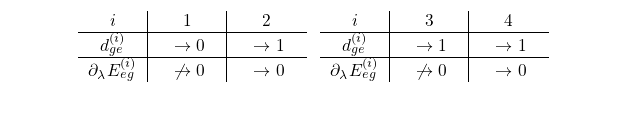

In [317]:
fig, ax = plt.subplots(figsize= (5,1))

plt.axis('off')

# colLabels=(r'$i$',r'$1$',r'$2$',r'$3$',r'$4$')
# clust_data = [[r'$d_{ge}^{(i)}$',                    r'$\to 0$' , r'$\to 0$',r'$\to 0$',r'$\to 0$'],
#               [r'$\partial_{\lambda} E_{eg}^{(i)}$', r'$\to 0$' , r'$\to 0$',r'$\to 0$',r'$\to 0$']]

# colWidths = [.1,.1,.1,.1,.1]

# the_table = ax.table(cellText=clust_data,
#           colLabels=colLabels,
#           loc='center',colWidths = colWidths,
#                     rowLoc = 'center')

# the_table.set_zorder(10)

# table = r'\begin{table} \begin{tabular}{c|c|c|c|c}   $i$  & $1$  & $2$  & $3$   & $4$     \\ \hline   $d_{ge}^{(i)}$  & $~~~\to 0~~~$  & $~~~\to 1~~~$  & $~~~\to 1~~~$  & $~~~\to 1~~~$     \\ \hline  $\partial_{\lambda} E_{eg}^{(i)}$  & $~~~\not \to 0~~~$  & $~~~\to 0~~~$  & $~~~\to 0~~~$  & $~~~\to 0~~~$  \\    \end{tabular} \end{table}'
table = r'\begin{table} \begin{tabular}{c|c|c}   $i$  & $1$  & $2$     \\ \hline   $d_{ge}^{(i)}$  & $~~\to 0~~$  & $~~\to 1~~$     \\ \hline  $\partial_{\lambda} E_{eg}^{(i)}$  & $~~\not \to 0~~$  & $~~\to 0~~$  \\    \end{tabular} \end{table}'
table2 = r'\begin{table} \begin{tabular}{c|c|c}   $i$  & $3$  & $4$     \\ \hline   $d_{ge}^{(i)}$  & $~~\to 1~~$  & $~~\to 1~~$     \\ \hline  $\partial_{\lambda} E_{eg}^{(i)}$  & $~~\not \to 0~~$  & $~~\to 0~~$  \\    \end{tabular} \end{table}'


# plt.plot(np.arange(100))
ax.text(0.0,.3,table, size=50)
ax.text(0.5,.3,table2, size=50)


plt.savefig('table.pdf', transperent = True)

# Old version

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


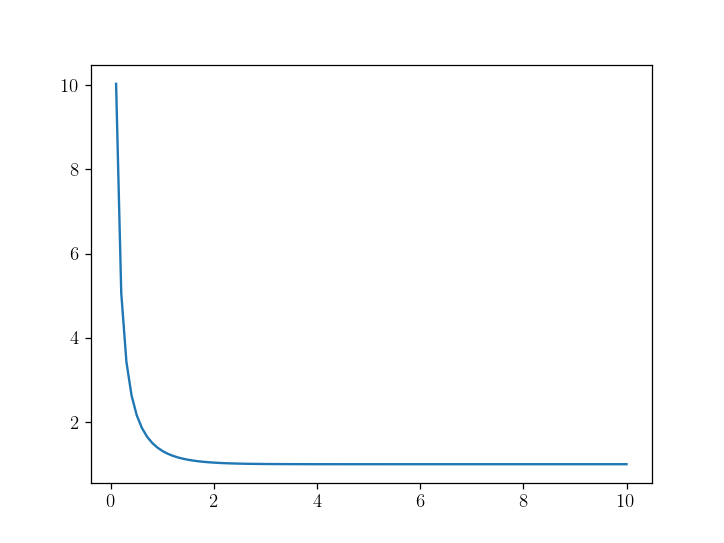

In [34]:
x = np.linspace(0,10,101)

y = 1/np.tanh(x)

fig, ax = plt.subplots()
ax.plot(x,y)

In [333]:
g = 4*(2*30/7)**.5
g
wp = (2*30*7)**.5
wp

t = g**.5*np.exp(-g)*wp
t*1e3


0.5754157494629167

<IPython.core.display.Javascript object>


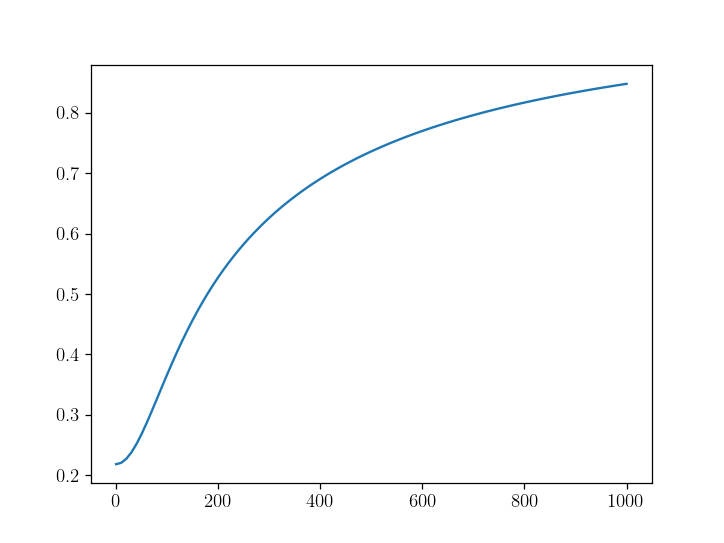

In [32]:
S = np.linspace(0.05,1000, 101)

C = 1/ (1+ 500/S*np.tanh(10*S/500)*np.exp(-0.1*np.exp(2.33 -1.5*.5/500) ))

fig, ax = plt.subplots()
ax.plot(S,C)

## Bars 


<IPython.core.display.Javascript object>


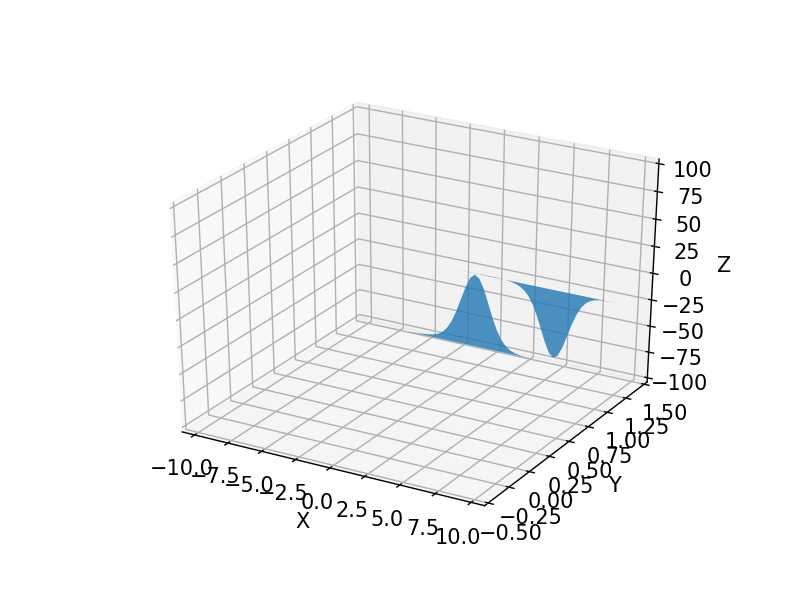

D:\anaconda\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [6]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib.collections import PolyCollection

from matplotlib import colors as mcolors


# Fixing random state for reproducibility
np.random.seed(19680801)


def cc(arg):
    '''
    Shorthand to convert 'named' colors to rgba format at 60% opacity.
    '''
    return mcolors.to_rgba(arg, alpha=0.6)


def polygon_under_graph(xlist, ylist):
    '''
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    '''
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make verts a list, verts[i] will be a list of (x,y) pairs defining polygon i
verts = []


for i in range(len(y))[2:4]:
    
    
    Psi = 300*st.get_Psi(band, i) + 0*st.get_E( band )
    Z = Q.V_L(fi_list, fi_ext) - Q.V_J1e(fi_list)
    verts.append(polygon_under_graph(x, Psi))
    


poly = PolyCollection(verts,  alpha=0.8)#, facecolors=[cc('r'), cc('g'), cc('b'), cc('y')])
ax.add_collection3d(poly, zs=y[2:4], zdir='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10.5,10.5)
ax.set_ylim(-0.5, 1.5)
ax.set_zlim(-100, 100)

plt.show()

<IPython.core.display.Javascript object>


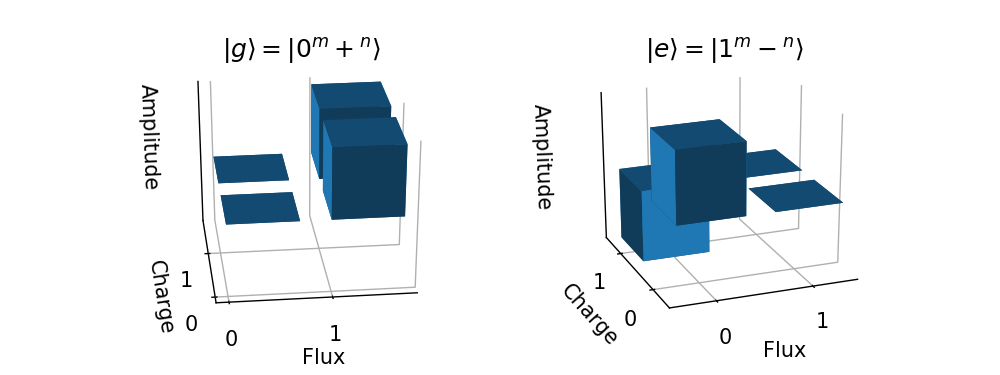

In [157]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(2)
_y = np.arange(2)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

n_p = np.array([1,1])
n_m = np.array([1,-1])

m_0 = np.array([0,1])
m_1 = np.array([1,0])


top = np.kron( n_p, m_0  )
bottom = np.zeros_like(top)
width = depth = 0.7

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, alpha = 0.5)
ax1.set_title(r'$|g\rangle = |0^m +^n \rangle $')

top = np.kron( n_m, m_1  )
bottom = np.zeros_like(top)
width = depth = 0.7

ax2.bar3d(x- width/2, y-depth/2, bottom, width, depth, top, shade=True)
# ax2.bar3d(x- width/2, y-depth/2, top, width, depth, bottom, shade=True)

ax2.set_title(r'$|e\rangle = |1^m -^n \rangle $')


for ax in [ax1, ax2]:
    ax.set_ylabel('Charge')
    ax.set_xlabel('Flux')
    ax.set_zlabel('Amplitude')
    
    # ax.set_xlim(-10.5,10.5)
    # ax.set_ylim(-0.5, 1.5)
    ax.set_zlim(-1, 1)
    
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
#     ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#     ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#     ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#     ax.set_xticklabels([0,1])
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])

    ax.set_zticks([])
#     ax.set_ztickslabels([0,1])


plt.show()

<IPython.core.display.Javascript object>


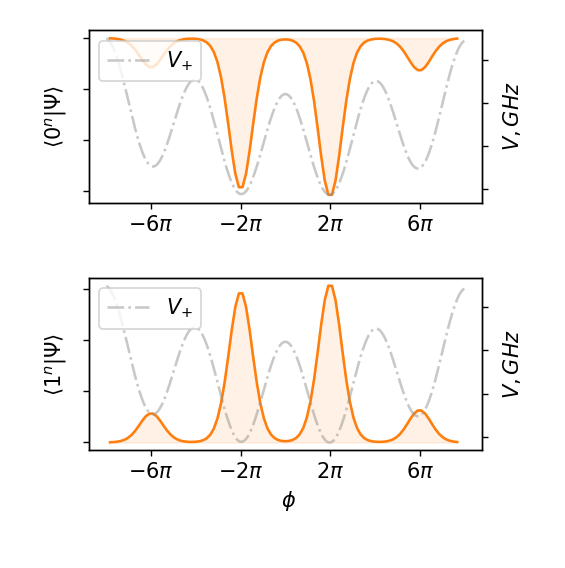

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5277: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5283: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [37]:
fig = plt.figure(figsize=(3.5, 3.3))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fi = np.linspace(-8*pi, 8*pi, 301)
fi_ext = 2*pi*0.05

band = 1
qs = [2,3]
axs = [ax1, ax2]

st = Q.set_state(ng = 0.5, fi_ext = fi_ext)

j = 0

# for band in [0,1]:

for q, ax in zip(qs, axs):

    
    ax_tw = ax.twinx()
    
    Vp = 1e4*Q.V_L(fi, fi_ext) + Q.V_J1e(fi) 
    Vm = 1e4*Q.V_L(fi, fi_ext) - Q.V_J1e(fi) 

    if band %2 == 0 :
        ax_tw.plot(fi /2/pi, Vp, 'xkcd:gray', ls = ':' , alpha=0.5 , label = '$V_{-}$')
        sl = slice(40,62)
    else:
        ax_tw.plot(fi /2/pi, Vm, 'xkcd:gray', ls = '-.',  alpha=0.5 , label = '$V_{+}$')
        sl = slice(50,75)

    sl = slice(1,99)
    Psi = 150*st.get_Psi(band, q) + 0*st.get_E( band )
    ax.fill_between(st.fi_list[sl] /2/pi, 0, Psi[sl], alpha = 0.1, color='C{:1d}'.format(band))
    ax.plot(st.fi_list[sl] /2/pi , Psi[sl], c='C{:1d}'.format(band), ls = '-' )



    ax_tw.set_ylabel('$V, GHz$')



    vmax = np.max([np.max(Vp), np.max(Vm) ] )
    vmin = np.min([np.min(Vp), np.min(Vm) ] )



#     ax.set_ylim(vmin - 0.2*np.abs(vmin),vmax) 
    ax_tw.legend(loc = 2)
    ax.set_ylabel (r'$\langle  {:1d}^n |\Psi \rangle $'.format(j) )
    j +=1


#     lim = ax.get_ylim()
#     ax_tw.set_ylim(lim)
#     ax_tw.set_ylim( (-50, 120) )
#     ax.set_ylim( (-50, 120) )
    
    ax.set_yticklabels([])
    ax_tw.set_yticklabels([])
    
    
    ticks_at = [-3,-1,1,3]
    ax.set_xticks(ticks_at)
    ax.set_xticklabels([r'${:1d} \pi$'.format(2*i) for i in ticks_at  ])


    
ax2.set_xlabel (' $\\phi$')
plt.tight_layout()


<IPython.core.display.Javascript object>


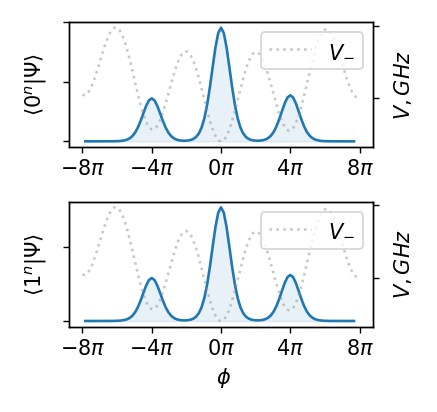

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5277: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5283: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [35]:
fig = plt.figure(figsize=(3.5, 3.3))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fi = np.linspace(-8*pi, 8*pi, 301)
fi_ext = 2*pi*0.05

band = 0
qs = [2,3]
axs = [ax1, ax2]

st = Q.set_state(ng = 0.5, fi_ext = fi_ext)

j = 0

# for band in [0,1]:

for q, ax in zip(qs, axs):

    
    ax_tw = ax.twinx()
    
    Vp = 10000*Q.V_L(fi, fi_ext) + Q.V_J1e(fi) 
    Vm = 10000*Q.V_L(fi, fi_ext) - Q.V_J1e(fi) 

    if band %2 == 0 :
        ax_tw.plot(fi /2/pi, Vp, 'xkcd:gray', ls = ':' , alpha=0.5 , label = '$V_{-}$')
        sl = slice(40,62)
    else:
        ax_tw.plot(fi /2/pi, Vm, 'xkcd:gray', ls = '-.',  alpha=0.5 , label = '$V_{+}$')
        sl = slice(50,75)

    sl = slice(1,99)
    Psi = 150*st.get_Psi(band, q) + 0*st.get_E( band )
    ax.fill_between(st.fi_list[sl] /2/pi, 0, Psi[sl], alpha = 0.1, color='C{:1d}'.format(band))
    ax.plot(st.fi_list[sl] /2/pi , Psi[sl], c='C{:1d}'.format(band), ls = '-' )



    ax_tw.set_ylabel('$V, GHz$')



    vmax = np.max([np.max(Vp), np.max(Vm) ] )
    vmin = np.min([np.min(Vp), np.min(Vm) ] )



#     ax.set_ylim(vmin - 0.2*np.abs(vmin),vmax) 
    ax_tw.legend(loc = 1)
    ax.set_ylabel (r'$\langle  {:1d}^n |\Psi \rangle $'.format(j) )
    j +=1


#     lim = ax.get_ylim()
#     ax_tw.set_ylim(lim)
#     ax_tw.set_ylim( (-50, 120) )
#     ax.set_ylim( (-50, 120) )
    
    ax.set_yticklabels([])
    ax_tw.set_yticklabels([])
    
    
    ticks_at = [-4,-2,0,2,4]
    ax.set_xticks(ticks_at)
    ax.set_xticklabels([r'${:1d} \pi$'.format(2*i) for i in ticks_at  ])


    
ax2.set_xlabel (' $\\phi$')
plt.tight_layout()


In [96]:
2%2


0

<IPython.core.display.Javascript object>


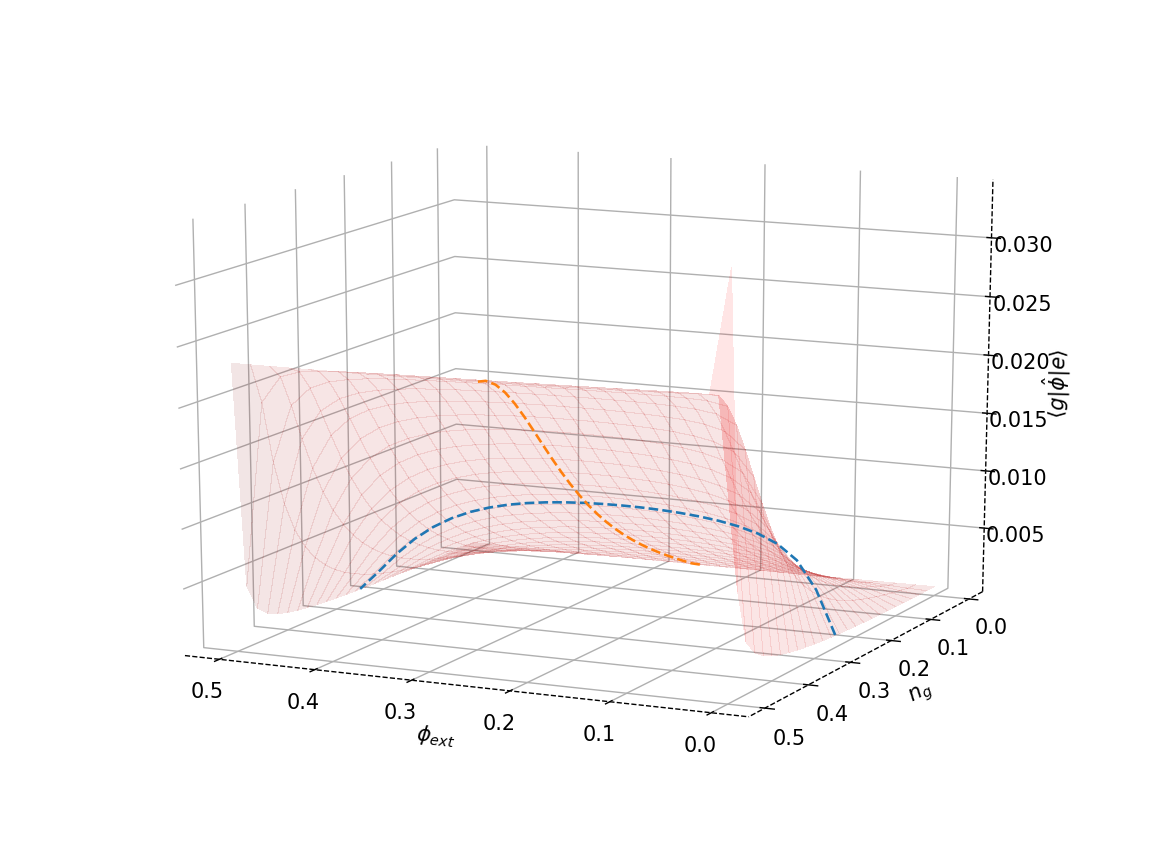

In [102]:
fig = plt.figure()
ax = fig.gca(projection='3d')


# for b in bands:

# fi3d = np.reshape(np.array([st.get_fi_ij(0,1)  for st in sts] )[:], (N_ng,N_fi ))


# surf = ax.plot_surface(ng_grd, fi_ext_grd, fi3d, color = 'b',
#                linewidth=0, antialiased=False, alpha = 0.1)


# ax.plot(ng_list, 0.25*np.ones(N_fi), fi3d[int(N_fi/2)], c = 'C0' )
# ax.plot(0.25*np.ones(N_ng),fi_ext_list/2/pi , fi3d[:, int(N_ng/2)], c = 'C1' )
# ax.plot(ng_list, np.ones(N_fi), fi3d[0], c = 'C2' )


n3d = np.reshape(np.array([st.get_n_ij(0,1)  for st in sts] )[:], (N_ng,N_fi ))


surf = ax.plot_surface(ng_grd, fi_ext_grd, n3d, color = 'r',
               linewidth=0, antialiased=False, alpha = 0.1)


ax.plot(ng_list, 0.25*np.ones(N_fi), n3d[int(N_fi/2)], c = 'C0' )
ax.plot(0.25*np.ones(N_ng),fi_ext_list/2/pi , n3d[:, int(N_ng/2)], c = 'C1' )
# ax.plot(ng_list, np.ones(N_fi), n3d[0], c = 'C2' )


ax.view_init(azim=115, elev=15)


# ax.set_zscale('log')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_ylabel(r'$n_g$')
ax.set_xlabel(r'$\phi_{ext}$')
ax.set_zlabel(r'$\langle  g|\hat{\phi} |e \rangle $')


plt.tight_layout()

<IPython.core.display.Javascript object>


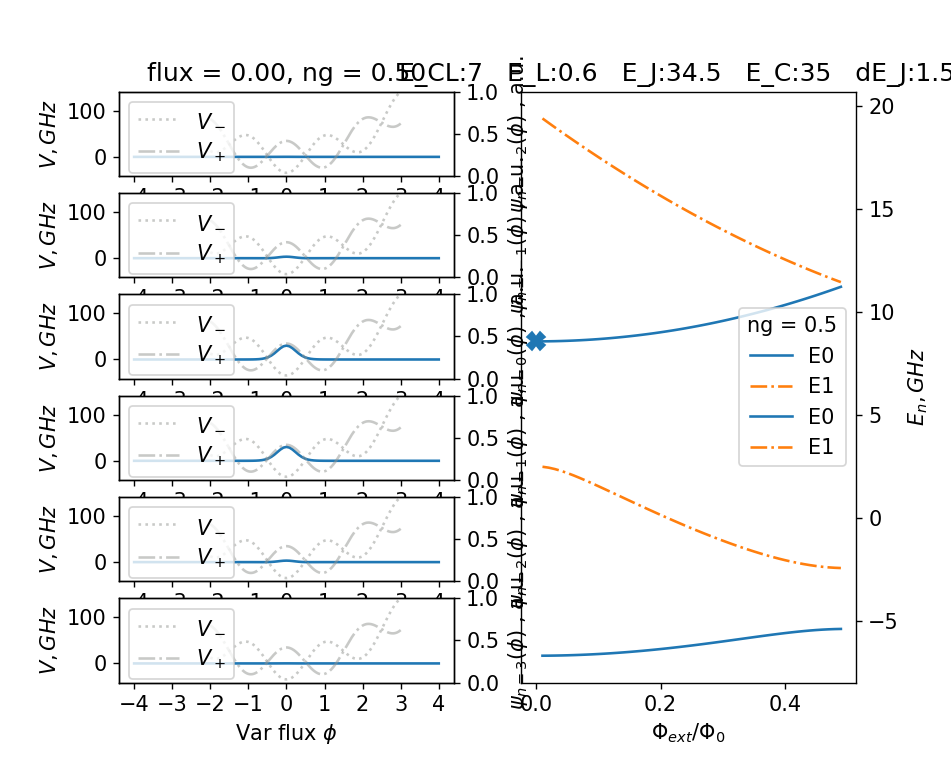

D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(<Figure size 1500x1000 with 13 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2a2d964deb8>])

In [23]:
ACQB15.plot_bands_Psi(fi_ext_list, [0,.5], [0,1])

In [ ]:


J1 = 33
J2 = 1*J1+0

ACQB15_s = ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

bands = [0,1,2]

In [ ]:
bands = [0,1]
Q = ACQB15_s

N_ng = 51
N_fi = 51

ng_list = np.linspace(0, 1, N_ng)
fi_ext_list = np.linspace(0, 2*pi, N_fi)

ng_grd, fi_ext_grd = np.meshgrid(ng_list, fi_ext_list/2/pi)

sts_s = [Q.set_state(ng = n, fi_ext = f) for n in ng_list for f in fi_ext_list ]

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')


for b in bands:

    E3d = np.reshape(np.array([st.get_E()  for st in sts_s] )[:,b], (N_ng,N_fi ))


    surf = ax.plot_surface(ng_grd, fi_ext_grd, E3d, color = 'b',
                   linewidth=0, antialiased=False, alpha = 0.1)


    ax.plot(ng_list, np.ones(N_fi), E3d[int(N_fi/2)], c = 'C0' )
    ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, int(N_ng/2)], c = 'C1' )
    ax.plot(ng_list, np.ones(N_fi), E3d[0], c = 'C2' )
#     ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, 0], c = 'C2' )

    
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)


# qp decay

In [58]:
bands = [0,1]
Q = ACQB15

N_ng = 51
N_fi = 51

ng_list = np.linspace(0, 1, N_ng)
fi_ext_list = np.linspace(0, 2*pi, N_fi)



<IPython.core.display.Javascript object>


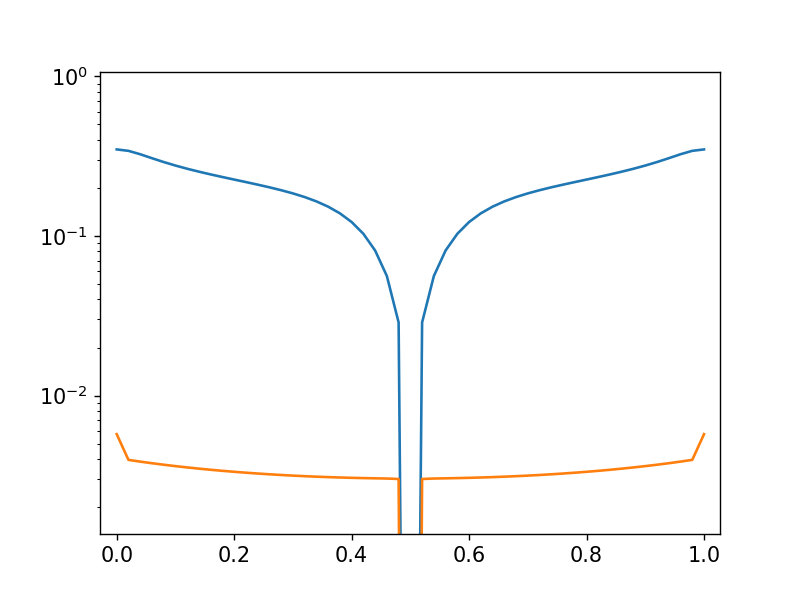

In [62]:
qp_ij = []

qp_ij_0e = Q.iterate_fi( fi_ext_list, 0.0, 'get_qp_ij',0,1 )

qp_ij_1e = Q.iterate_fi( fi_ext_list, 0.5, 'get_qp_ij',0,1 )

fig,ax = plt.subplots()

ax.plot(fi_ext_list/2/pi, qp_ij_0e)
ax.plot(fi_ext_list/2/pi, qp_ij_1e)

ax.set_yscale('log')